# Proyecto Analítica

## 1. - Generar un Exploratory Data Analysis (EDA) en Python: se deben incluir, por lo menos, los siguientes puntos:

#### 1.1 y 1.2. - Describir generalmente la base de datos, incluyendo el tamaño, tipos de datos, valores nulos/blancos, valores atípicos. Detallar el criterio empleado para manejo de valores nulos y/o atípicos (si aplica): ¿qué se hizo con ellos?, ¿cómo los gestionaron?, etc

In [146]:
# Importar todas las librerias que nos permitirán realizar el análisis
import pandas as pd  # Permite trabajar los dataframes
import numpy as np   # Permite cálculos númericos y análisis de datos
import matplotlib.pyplot as plt # Permite gráficar los datos
import seaborn as sns     # Permite crear gráficas de correlación
from sklearn.model_selection import train_test_split  # Sirve para realizar la división de la base de datos

In [147]:
import pandas as pd
#datos_hospital=pd.read_excel("/content/drive/MyDrive/pro/PublicHospitalDataset - Copy.xlsx")
datos_hospital=pd.read_excel("PublicHospitalDataset - Copy.xlsx")
datos_hospital.shape

(5112, 13)

In [148]:
datos_hospital.head()

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,725445.0,3,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,235422.0,0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,278207.0,3,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,22613.0,1,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,48161.0,3,1


In [149]:
# Es importante crear una copia del Dataframe para de esta manera manipularlo correctamente
datos_hospital_copia = datos_hospital

In [150]:
# Imprimir el tamaño del dataframe
print(datos_hospital_copia.shape)

(5112, 13)


In [151]:
# Mostrar el tipo de dato que contiene la base
datos_hospital_copia.dtypes

Hypertension           int64
Heart Disease         object
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                  float64
Income               float64
Children               int64
Stroke                 int64
dtype: object

Para poder entender los valores atípicos que exstien en las variables continuas se necesta utilizar la regla del rango intercuartil "IQR". Tomando en cuenta que es la diferencia entre el tercer cuartil "Q3" y el primer cuartil "Q1" de los datos. Para clasificar como valor atípico se tomará en cuenta todo valor que este debajo de "Q1" - 1.5("IQR") o que esté por encima de "Q3" + 1.5("IQR") y deberá ser eliminado.

Referencias:
    * https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html

In [152]:
# Crear una lista de las variables que tienen datos continuos
variables_c = ["Age", "Avg_glucose_level", "Bmi", "Income", "Children"]

# Crear un bucle for para poder iterar cada variable, es decir crear los cuartiles
for var in variables_c:
    Q1 = datos_hospital_copia[var].quantile(0.25)
    Q3 = datos_hospital_copia[var].quantile(0.75)

# Calcular el rango intercuartil
    IQR = Q3 - Q1

# Determinar los límites inferior y superior
    limite_bajo = Q1 - (1.5 * IQR)
    limite_alto = Q3 + (1.5 * IQR)

# Filtrar los valores atípicos
    atipicos = datos_hospital_copia[(datos_hospital_copia[var] < limite_bajo) | (datos_hospital_copia[var] > limite_alto)]

# Imprimir los resultados por cada una de las varibalbes
    print("\n", var + ":")
    print(atipicos[var].unique())
    print("Se tienen", atipicos[var].count(), "valores atípicos en columna", var)


 Age:
[]
Se tienen 0 valores atípicos en columna Age

 Avg_glucose_level:
[228.69 202.21 171.23 174.12 186.21 219.84 214.09 191.61 221.29 217.08
 193.94 233.29 228.7  208.3  189.84 195.23 211.78 212.08 196.92 252.72
 219.72 213.03 243.58 197.54 196.71 237.75 194.99 180.93 185.17 221.58
 179.12 228.56 240.09 226.98 235.63 240.59 190.32 231.61 191.82 224.1
 216.94 259.63 249.31 219.91 200.59 190.14 182.99 206.09 263.32 207.28
 194.37 199.2  221.79 239.07 169.67 223.83 231.56 221.89 195.71 203.87
 185.49 213.22 215.94 209.86 205.77 271.74 200.62 242.52 175.29 208.65
 205.33 210.4  199.86 219.73 250.89 205.35 216.58 184.4  199.84 218.46
 211.06 197.28 233.94 247.51 210.95 243.53 205.84 198.21 206.72 214.45
 190.7  203.04 242.3  220.49 216.7  234.58 235.85 243.5  182.2  229.92
 215.6  239.64 200.28 205.23 209.58 210.78 251.6  213.37 223.36 178.29
 203.81 205.26 211.03 225.47 180.63 227.1  201.76 170.05 217.3  196.01
 184.15 198.69 186.17 183.45 210.48 193.83 183.34 247.69 191.47 239.82
 18

Estos son los resultados que se determinaron a cada una de las columnas:

*   **Age:** No se encontro ningun valor atípico.
*   **Avg_glucose_level:** Se encontraron 627 datos atípicos, esto puede darse por que los cuartiles estan muy cercanos entre si y estos datos sobresalen. Además, según el Centro para el Control y la Prevención de Enfermedades, "Los valores de azúcar en la sangre en ayunas de 99 mg/dl o menores son normales, los de 100 a 125 mg/dl indican que tiene prediabetes y los de 126 mg/dl o mayores indican que tiene diabetes".
*   **BMI:** Se puede notar que existe un error de medicion con el valor 40000, se tiene que revisar si existen mas datos asi para eliminarlos.
*   **Income:** Como son 7 valores y todos calzan dentro de las ganancias anuales no se realiza ningun cambio.
*   **Children:** Existen tan solo dos datos atípicos, pero son datos que se pueden dar.

En conclusión se tiene que revisar unicamente la columna de BMI por los valores de 40000.

Referencias:
* Centro para el Control y la Prevención de Enfermedades (s.f.). Detección. https://www.cdc.gov/diabetes/spanish/basics/getting-tested.html#:~:text=Los%20valores%20de%20az%C3%BAcar%20en,mayores%20indican%20que%20tiene%20diabetes.&text=Esta%20prueba%20mide%20sus%20niveles,un%20l%C3%ADquido%20que%20contiene%20glucosa.

In [153]:
# Para poder determinar cuales son los valores de 40000 se utiliza isin() que permite buscarlos y al utilizar ~ selecciona los demas que no estan presentes en la columna
datos_hospital_copia = datos_hospital_copia[~datos_hospital_copia["Bmi"].isin([40000])]

In [154]:
# Imprimir el tamaño del dataframe
print(datos_hospital_copia.shape)

(5108, 13)


Ahora se realiza la revisión de los valores atípicos en las variables categóricas

In [155]:
# Agrupar el DataFrame por cada columna de tipo 'object'
datos = datos_hospital_copia.select_dtypes(include=["object"]).groupby(by=lambda x: x, axis=1)

# Correr y repetir sobre cada grupo
for col, group in datos:
    print("\n", col + ":")
    print(group.apply(lambda x: x.value_counts()))


 Gender:
        Gender
Gender        
Female    2993
Male      2038
Other       77

 Heart Disease:
               Heart Disease
Heart Disease               
0                       4831
1                        276
No                         1

 Married:
         Married
Married         
Yes         3353
No          1755

 Residence:
           Residence
Residence           
Urban           2596
Rural           2512

 Smoking:
                 Smoking
Smoking                 
never smoked        1892
Unknown             1542
formerly smoked      885
smokes               788
weed                   1

 Work:
               Work
Work               
Private        2915
Self-employed   817
children        687
Govt_job        657
Never_worked     22
kñsdh-k           4
sdfsdf            3
dsfsdf            2
sdsd-i            1


Estos son los resultados que se determinaron a cada una de las columnas:

*   **Gender:** Existen 77 valores "Other" que serán eliminados.
*   **Heart Disease:** Existe un dato "No", ese al ser valoradon el número 0 se cambiará por ese.
*   **Smoking:** Se encontro un solo valor atípico que es weed, este valor será eliminado.
*   **Work:** Se nota que existen 10 datos que son atípicos ya que los valores que representan no se encuentra dentro de la base de datos por lo que serán eliminados.

In [156]:
# Eliminar los valores atípicos de la columna Work de la misma forma que se utilizo en BMI
datos_hospital_copia = datos_hospital_copia[~datos_hospital_copia["Work"].isin(["kñsdh-k", "sdfsdf", "dsfsdf", "sdsd-i"])]

In [157]:
# Imprimir el tamaño del dataframe
print(datos_hospital_copia.shape)

(5098, 13)


In [158]:
# Eliminar los valores atípicos de la columna Gender de la misma forma que se utilizo en BMI
datos_hospital_copia = datos_hospital_copia[~datos_hospital_copia["Gender"].isin(["Other"])]

In [159]:
# Imprimir el tamaño del dataframe
print(datos_hospital_copia.shape)

(5021, 13)


In [160]:
# Eliminar los valores atípicos de la columna Smoking de la misma forma que se utilizo en BMI
datos_hospital_copia = datos_hospital_copia[~datos_hospital_copia["Smoking"].isin(["weed"])]

In [161]:
# Imprimir el tamaño del dataframe
print(datos_hospital_copia.shape)

(5020, 13)


In [162]:
# Reemplazar "No" por 0
datos_hospital_copia['Heart Disease'] = datos_hospital_copia['Heart Disease'].replace('No', 0)

In [163]:
# Imprimir el tamaño del dataframe
print(datos_hospital_copia.shape)

(5020, 13)


In [164]:
# Identificamos si existen valores nulos y en blanco para cada columna
print(datos_hospital_copia.isnull().sum())

Hypertension           0
Heart Disease          0
Married                0
Work                   0
Residence              0
Avg_glucose_level      0
Bmi                  197
Smoking                0
Gender                 0
Age                    0
Income                26
Children               0
Stroke                 0
dtype: int64


Al ver la cantidad de valores faltantes en la columna "BMI" y la columna "Income" estas representan el 4% del tamaño total del DataFrame, por esta razón se puede cambiar por la media, la mediana o la moda de las mismas columnas ya que esto no afecta significativamente el análisis y el modelado.

Referencia:
Graham, J. W. (2009). Missing data analysis: making it work in the real world. Annual review of psychology, 60, 549-576.

Si la distribución de los datos es simétrica o cercana a la simetría, la media puede ser utilizada para sustituir los valores faltantes. Sin embargo, si la distribución de los datos es sesgada, es preferible emplear la mediana para reemplazar los valores faltantes.

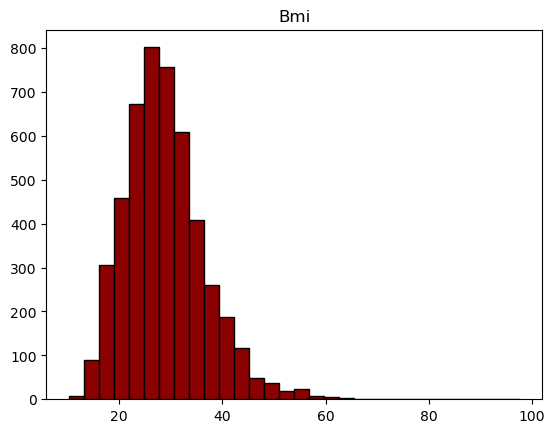

In [165]:
# Realizamos un histograma para ver la distribución de "Bmi"
plt.hist(datos_hospital_copia['Bmi'], bins=30, color = "darkred", edgecolor = "black")
plt.title("Bmi")
plt.show()

#Referencia: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

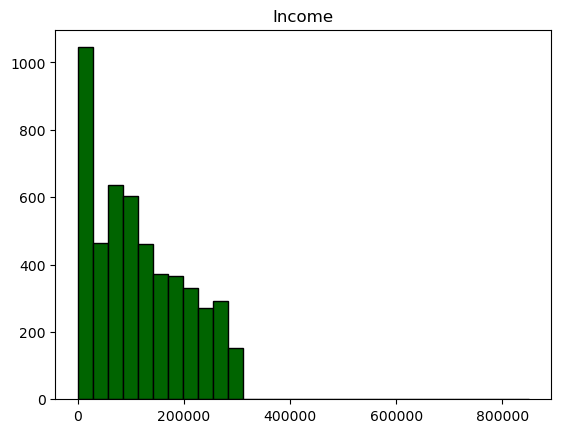

In [166]:
# Realizamos un histograma para ver la distribución de "Income"
plt.hist(datos_hospital_copia['Income'], bins=30, color = "darkgreen", edgecolor = "black")
plt.title("Income")
plt.show()

#Referencia: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [167]:
# Crear una variable con la mediana de la columa "Bmi"
median_bmi = datos_hospital_copia['Bmi'].median()

# Rellenamos los valores faltantes con la varible creada
datos_hospital_copia['Bmi'] = datos_hospital_copia['Bmi'].fillna(median_bmi)

# Crear una variable con la mediana de la columa "Income"
median_income = datos_hospital_copia['Income'].median()

# Rellenamos los valores faltantes con la varible creada
datos_hospital_copia['Income'] = datos_hospital_copia['Income'].fillna(median_income)

#Referencia: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [168]:
# Identificar si existen valores nulos y en blanco para cada columna ya arreglada
print(datos_hospital_copia.isnull().sum())

Hypertension         0
Heart Disease        0
Married              0
Work                 0
Residence            0
Avg_glucose_level    0
Bmi                  0
Smoking              0
Gender               0
Age                  0
Income               0
Children             0
Stroke               0
dtype: int64


### 1.3 Analice la correlación entre variables predictivas. ¿Cuáles variables parecen afectar a la variable respuesta?

Para poder determinar la correlación entre las variables, lo primero que se debe realizar es pasar las variables categoricas a variables dummies

In [169]:
# Determinar las columnas que tengan variables categóricas
var_cate = datos_hospital_copia.select_dtypes(include=['object']).columns

# Crear las variables dummies
dummies = pd.get_dummies(datos_hospital_copia[var_cate], prefix = var_cate, drop_first=True)
datos_hospital_copia = pd.concat([datos_hospital_copia, dummies], axis=1)

# Eliminar las columnas orginales
datos_hospital_copia.drop(var_cate, axis=1, inplace=True)

datos_hospital_copia

,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Income,Children,Stroke,Married_Yes,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,Residence_Urban,Smoking_formerly smoked,Smoking_never smoked,Smoking_smokes,Gender_Male
0,0,1,228.69,36.6,67.0,725445.0,3,1,True,False,True,False,False,True,True,False,False,True
1,0,0,202.21,28.0,61.0,235422.0,0,1,True,False,False,True,False,False,False,True,False,False
2,0,1,105.92,32.5,80.0,278207.0,3,1,True,False,True,False,False,False,False,True,False,True
3,0,0,171.23,34.4,49.0,22613.0,1,1,True,False,True,False,False,True,False,False,True,False
4,1,0,174.12,24.0,79.0,48161.0,3,1,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,82.99,30.6,35.0,37325.0,2,0,True,False,False,True,False,False,False,True,False,False
5108,0,0,166.29,25.6,51.0,56478.0,0,0,True,False,True,False,False,False,True,False,False,True
5109,0,0,85.28,26.2,44.0,77772.0,0,0,True,False,False,False,False,True,False,False,False,False
5110,1,0,90.51,31.0,33.0,18883.0,3,0,True,False,False,False,True,True,True,False,False,False


In [170]:
# Ordenamos según el nombre en orden alfabético
datos_hospital_copia = datos_hospital_copia.sort_index(axis=1)

datos_hospital_copia

,Age,Avg_glucose_level,Bmi,Children,Gender_Male,Heart Disease,Hypertension,Income,Married_Yes,Residence_Urban,Smoking_formerly smoked,Smoking_never smoked,Smoking_smokes,Stroke,Work_Never_worked,Work_Private,Work_Self-employed,Work_children
0,67.0,228.69,36.6,3,True,1,0,725445.0,True,True,True,False,False,1,False,True,False,False
1,61.0,202.21,28.0,0,False,0,0,235422.0,True,False,False,True,False,1,False,False,True,False
2,80.0,105.92,32.5,3,True,1,0,278207.0,True,False,False,True,False,1,False,True,False,False
3,49.0,171.23,34.4,1,False,0,0,22613.0,True,True,False,False,True,1,False,True,False,False
4,79.0,174.12,24.0,3,False,0,1,48161.0,True,False,False,True,False,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,35.0,82.99,30.6,2,False,0,0,37325.0,True,False,False,True,False,0,False,False,True,False
5108,51.0,166.29,25.6,0,True,0,0,56478.0,True,False,True,False,False,0,False,True,False,False
5109,44.0,85.28,26.2,0,False,0,0,77772.0,True,True,False,False,False,0,False,False,False,False
5110,33.0,90.51,31.0,3,False,0,1,18883.0,True,True,True,False,False,0,False,False,False,True


In [171]:
# Cambiamos los nombres para mejor visualización y manejo
datos_hospital_copia.rename(columns={'Age': 'age', 'Avg_glucose_level': 'avg_glucose_level', 'Bmi': 'bmi', "Children": "children", "Gender_Male": "male", 'Heart Disease': 'heart_disease', 'Hypertension' : 'hypertension', 'Married_Yes': 'married', 'Work_Never_worked': 'never_worked', 'Work_Self-employed': 'self_employed',"Work_Private" : "work_private",'Work_children': 'work_children', 'Smoking_formerly smoked': 'formerly_smoked', 'Smoking_never smoked': 'never_smoked','Smoking_smokes':'smokes', "Residence_Urban":"urban", "Income" : "income", "Stroke" : "stroke" }, inplace=True)

In [172]:
datos_hospital_copia

,age,avg_glucose_level,bmi,children,male,heart_disease,hypertension,income,married,urban,formerly_smoked,never_smoked,smokes,stroke,never_worked,work_private,self_employed,work_children
0,67.0,228.69,36.6,3,True,1,0,725445.0,True,True,True,False,False,1,False,True,False,False
1,61.0,202.21,28.0,0,False,0,0,235422.0,True,False,False,True,False,1,False,False,True,False
2,80.0,105.92,32.5,3,True,1,0,278207.0,True,False,False,True,False,1,False,True,False,False
3,49.0,171.23,34.4,1,False,0,0,22613.0,True,True,False,False,True,1,False,True,False,False
4,79.0,174.12,24.0,3,False,0,1,48161.0,True,False,False,True,False,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,35.0,82.99,30.6,2,False,0,0,37325.0,True,False,False,True,False,0,False,False,True,False
5108,51.0,166.29,25.6,0,True,0,0,56478.0,True,False,True,False,False,0,False,True,False,False
5109,44.0,85.28,26.2,0,False,0,0,77772.0,True,True,False,False,False,0,False,False,False,False
5110,33.0,90.51,31.0,3,False,0,1,18883.0,True,True,True,False,False,0,False,False,False,True


Para poder determinar como afectan a la variable de respuesta "Stroke" se debe buscar las correlaciones mas altas entre la variable de respuesta y las demas variables.


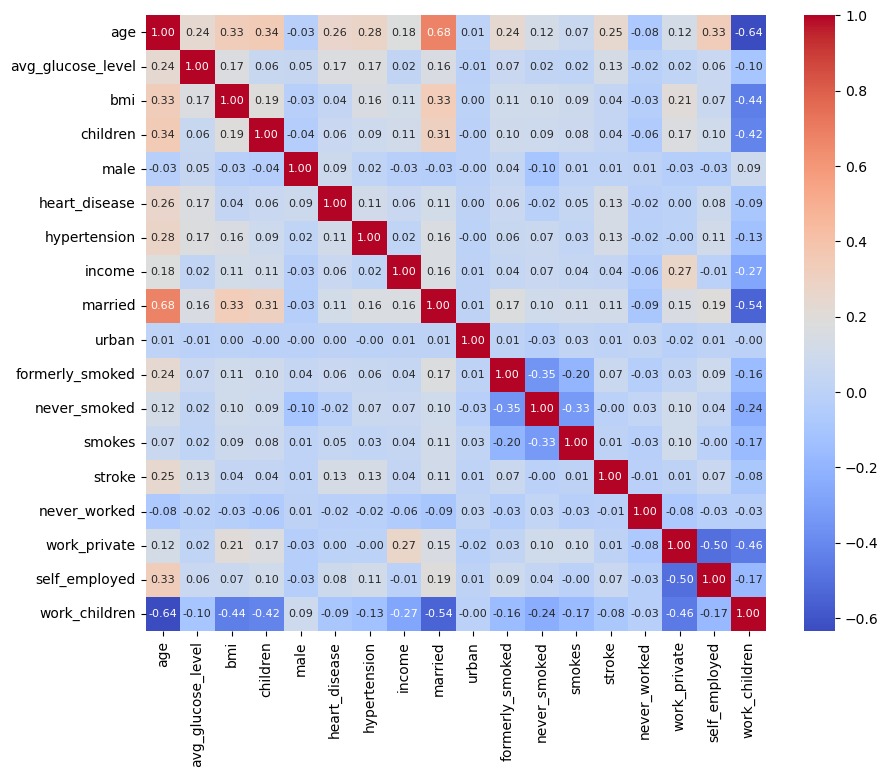

In [173]:
# Crear la matriz de correlación
plt.figure(figsize=(10, 8))
correlacion = datos_hospital_copia.corr()
sns.heatmap(correlacion, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size": 8})
plt.show()

Hemos elegido como significativas las variables que son mayores a 0.10 en relación a la variable de respuesta "Strokes". Esto se definió ya que una gran cantidad de variables tienen correlación de alrededor de 0.10 con los ataques. Por lo tanto, las variables con correlación son:

*   La edad del paciente
*   La cantidad promedio de glucosa
*   Si tiene enfermedad al corazón
*   Si tiene hipertensión
*   Si es que estan casados

Es fundamental recordar que la correlación no siempre indica causalidad. A pesar de que dos variables puedan tener una correlación alta, esto no implica automáticamente que una variable cause la otra.




### 1.4 Visualización de Datos: Visualice todas las variables predictivas y describa su distribución. Analice la distribución de la variable respuesta.

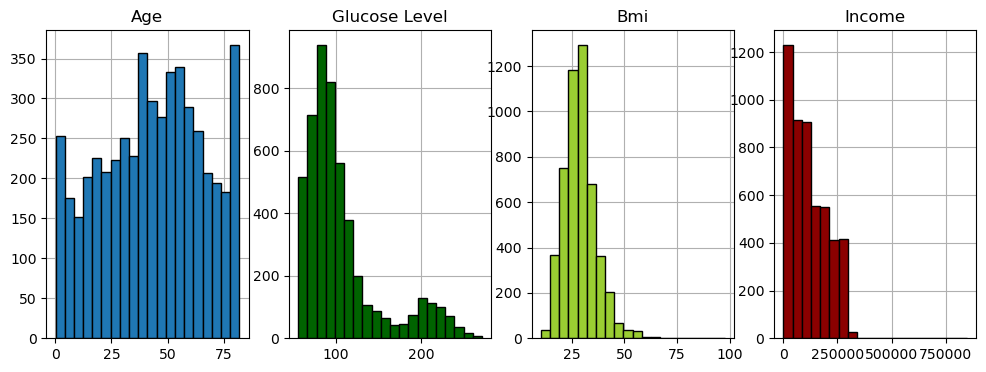

In [174]:
# Realizamos histogramas de las variables continuas

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].hist(datos_hospital_copia['age'], bins=20, edgecolor="black")
axs[0].set_title('Age')
axs[0].grid(True, zorder=0)

axs[1].hist(datos_hospital_copia['avg_glucose_level'], bins=20, color='darkgreen', edgecolor="black")
axs[1].set_title('Glucose Level')
axs[1].grid(True, zorder=0)

axs[2].hist(datos_hospital_copia['bmi'], bins=20, color='yellowgreen', edgecolor="black")
axs[2].set_title('Bmi')
axs[2].grid(True, zorder=0)

axs[3].hist(datos_hospital_copia['income'], bins=20, color='darkred', edgecolor="black")
axs[3].set_title('Income')
axs[3].grid(True, zorder=0)

for ax in axs:
    ax.set_axisbelow(True)  # Para asegurarse de que las mallas estén detrás de los gráficos

plt.show()

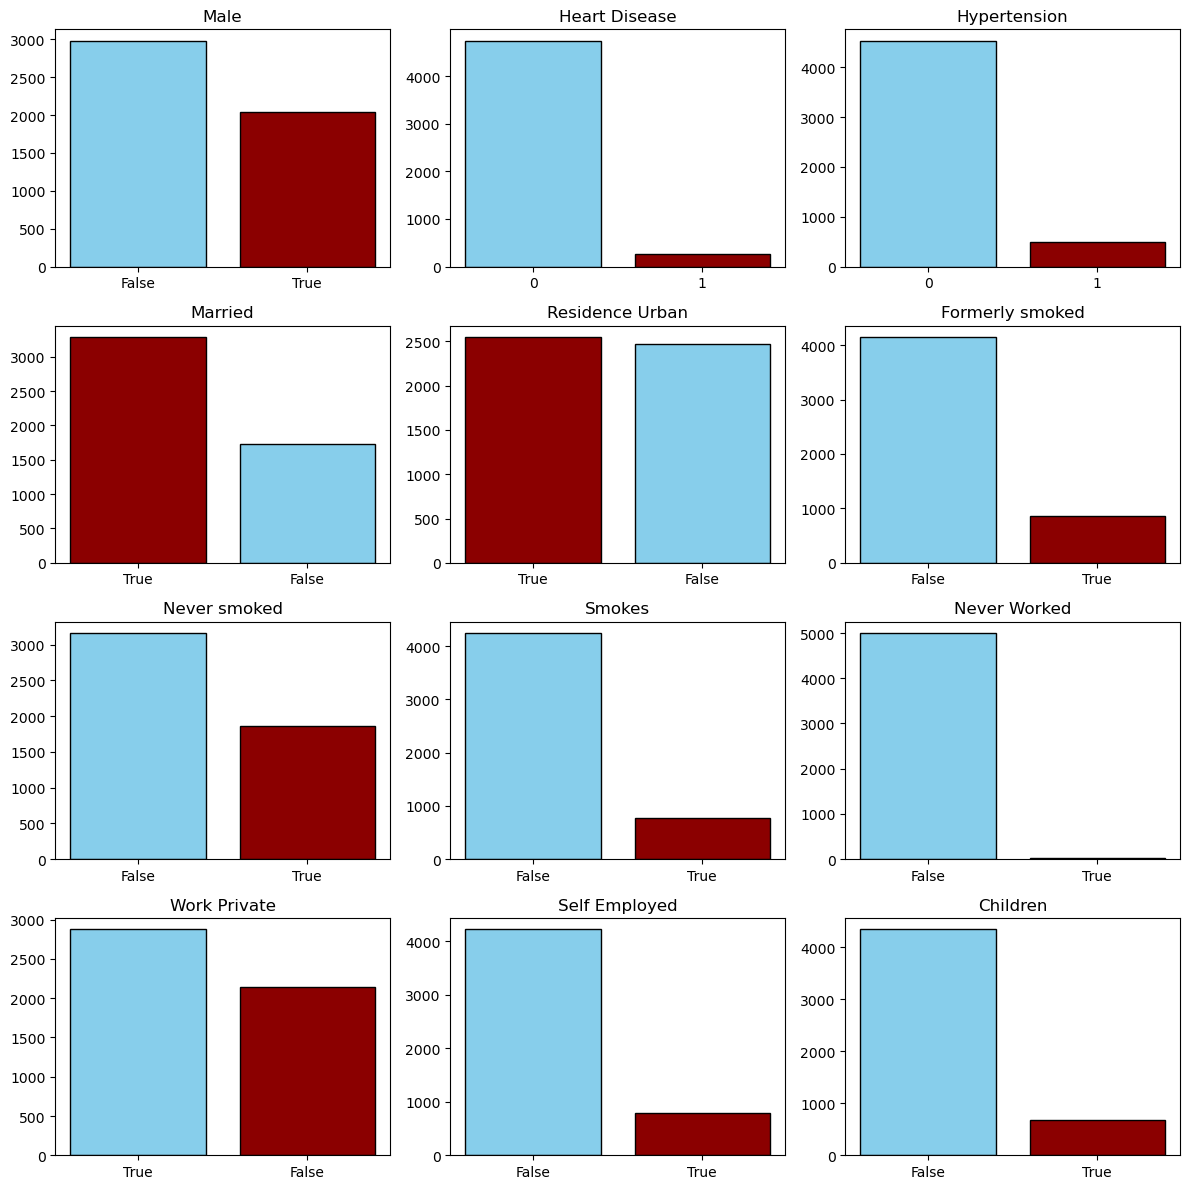

In [175]:
# Realizamos tablas de frecuencia para las variables categóricas

fig, axs = plt.subplots(4, 3, figsize=(12, 12))
axs[0,0].bar(datos_hospital_copia['male'].value_counts().index.astype(str), datos_hospital_copia['male'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[0,0].set_title('Male')
axs[0,1].bar(datos_hospital_copia['heart_disease'].value_counts().index.astype(str), datos_hospital_copia['heart_disease'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[0,1].set_title('Heart Disease')
axs[0,2].bar(datos_hospital_copia['hypertension'].value_counts().index.astype(str), datos_hospital_copia['hypertension'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[0,2].set_title('Hypertension')
axs[1,0].bar(datos_hospital_copia['married'].value_counts().index.astype(str), datos_hospital_copia['married'].value_counts(),color=['darkred', 'skyblue'], edgecolor = "black")
axs[1,0].set_title('Married')
axs[1,1].bar(datos_hospital_copia['urban'].value_counts().index.astype(str), datos_hospital_copia['urban'].value_counts(),color=['darkred', 'skyblue'], edgecolor = "black")
axs[1,1].set_title('Residence Urban')
axs[1,2].bar(datos_hospital_copia['formerly_smoked'].value_counts().index.astype(str), datos_hospital_copia['formerly_smoked'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[1,2].set_title('Formerly smoked')
axs[2,0].bar(datos_hospital_copia['never_smoked'].value_counts().index.astype(str), datos_hospital_copia['never_smoked'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[2,0].set_title('Never smoked')
axs[2,1].bar(datos_hospital_copia['smokes'].value_counts().index.astype(str), datos_hospital_copia['smokes'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[2,1].set_title('Smokes')
axs[2,2].bar(datos_hospital_copia['never_worked'].value_counts().index.astype(str), datos_hospital_copia['never_worked'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[2,2].set_title('Never Worked')
axs[3,0].bar(datos_hospital_copia['work_private'].value_counts().index.astype(str), datos_hospital_copia['work_private'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[3,0].set_title('Work Private')
axs[3,1].bar(datos_hospital_copia['self_employed'].value_counts().index.astype(str), datos_hospital_copia['self_employed'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[3,1].set_title('Self Employed')
axs[3,2].bar(datos_hospital_copia['work_children'].value_counts().index.astype(str), datos_hospital_copia['work_children'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs[3,2].set_title('Children')

plt.tight_layout()
plt.show()

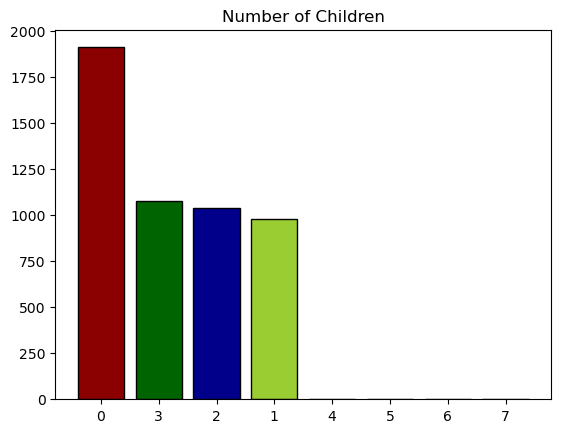

In [176]:
# Creamos una tabla de frecuencias especial para la cantidad de hijos
frequencies = datos_hospital_copia['children'].value_counts()
num_values = len(frequencies)
colors = ["darkred", "darkgreen", "darkblue", "yellowgreen"]
color = colors * (num_values // len(colors)) + ["gray"] * (num_values % len(colors))
fig, ax = plt.subplots()

for i, (value, frequency) in enumerate(frequencies.items()):
    ax.bar(str(value), frequency, color=color[i], edgecolor="black")

ax.set_title('Number of Children')
plt.show()

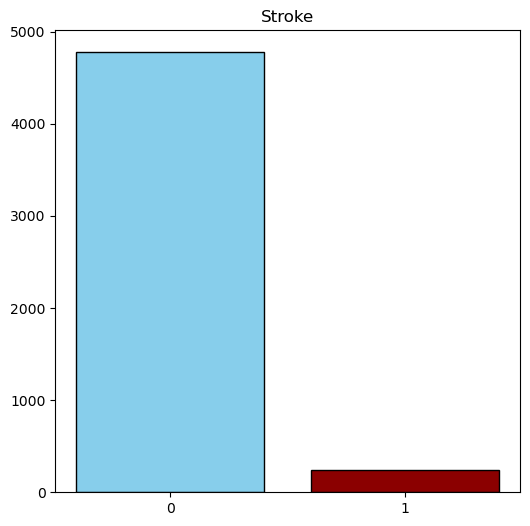

stroke
0    4775
1     245
Name: count, dtype: int64

In [177]:
# Gráfico de barras de la variable respuesta "Stroke"
fig, axs = plt.subplots(figsize=(6, 6))
axs.bar(datos_hospital_copia['stroke'].value_counts().index.astype(str), datos_hospital_copia['stroke'].value_counts(),color=['skyblue', 'darkred'], edgecolor = "black")
axs.set_title('Stroke')
plt.show()

#Contar las observaciones que tuvieron un ataque cerebral y las que no
datos_hospital_copia['stroke'].value_counts()

Se puede observar que la base de datos se encuentra desbalanceada ya que el 95.12% de los datos coinciden con que no han tenido ningun ataque.

## 2.La base de datos no está balanceada. Investigue que es una base de datos no balanceada utilizando fuentes de referencia confiables (libros y papers), los problemas con este tipo de base de datos y al menos dos técnicas utilizadas durante el entrenamiento del algoritmo para reducir su efecto negativo.

## 3.Divida la base de datos en un set de entrenamiento, un set de validación y un set de prueba. Justifique en base a la literatura el porcentaje de datos que se va a cada set (incluya al menos una referencia de papers o libros

Para poder entender lo que es una base de datos que no se encuentra balanceada primero se deben entender que tiene una base de datos, es decir, sus clases o categorías que tiene la variable de respuesta. Estas por lo general tienen una proporción dentro de las mismas, entonces al estar desbalanceada significa que están desproporcionadamente representadas. Para entender mejor, si una base de datos de una tienda tiene que la cantidad de transacciones realizadas con efectivo es del 97% y con tarjeta el 3% significa que esta desbalanceada la base de datos. Estas bases de datos pueden generar problemas cuando se trabajan con las mismas:

*   El modelo se sesgará a la clase con mayor proporción.
*   Existirán problemas de generalización porque el modelo pudo haber sido entrenado solo con la clase mayoritaria.
*   La precisión del modelo según la clase minoritaria puede ser muy baja.
*   Las métricas que se utilizarán para evaluar el modelo serán engañosas porque no va a poder reflejar la capacidad de identificar la clase minoritaria.

No todo es malo, se puede reducir el efecto negativo que dan las bases de datos no balanceadas a la hora de realizar el entrenamiento del modelo utilizando varias técnicas como las siguientes:
1.	Ajuste de umbrales de decisión: Dependiendo la base de datos y las categorías que se tenga, en algunos casos se puede mejorar la precisión en la clase minoritaria justando los umbrales de decisión.
2.	Submuestreo de la clase mayoritaria: Esto permite reducir el número de datos que tiene la clase mayoritaria para que de esta manera se pueda equilibrar la distribución de los datos, se puede realizar mediante eliminación aleatoria o seleccionando datos más representativos.
3.	Sobremuestreo de la clase minoritaria: Esto permite aumentar el número de datos que tiene la clase minoritaria para que de esta manera se pueda equilibrar la distribución de los datos, se puede realizar mediante técnicas como ADASYN (Adaptive Synthetic Sampling), (Synthetic Minority Over-sampling Technique) o también creando copias de los datos ya existentes.
4.	Algoritmos clasificación específicos: Existen algoritmos que fueron diseñados para ser utilizados específicamente con bases de datos desbalanceads, como RUSBoost, Balanced Random Forest o EasyEnsemble.

Para el siguiente proyecto utilizaremos la técnica de RandomUnderSampler para reducir la clase mayoritaria y luego se utilizará la técnica de sobremuestreo SMOTE para así aumentar el tamaño de la clase minoritaria. Este resultado será una base de datos balanceada que se puede utilizar en los modelos de aprendizaje automático.
Una vez ya balanceada la base de datos se tiene que separar en sets de datos para el entrenamiento, prueba y validación. Estos sets dependen mucho de el tamaño del conjunto de datos, de la complejidad del modelo que se va a utilizar, los hiperparámetros, etc.

(3) Lo recomendado es que siempre se guarde al menos el 20% de los datos para el set de prueba, y que el resto se divida en un set de entrenamiento y un set de validación. Para este proyecto se utilizará la división de 60% para entrenamiento, 20% para validación y 20% para prueba. Con esto se puede entrenar el modelo, colocar los hiperparámetros adecuados y así evaluar de forma correcta el rendimiento del modelo de manera independiente.

Referencias:

*   Fernández-Delgado, M., Cernadas, E., Barro, S., & Amorim, D. (2014). Do we need hundreds of classifiers to solve real world classification problems?. Journal of Machine Learning Research, 15(1), 3133-3181. https://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf
*   García, S., Fernández, A., García, S., & Herrera, F. (2009). A study of the behaviour of linguistic fuzzy rule-based classification systems in the framework of imbalanced data-sets. Fuzzy Sets and Systems, 160(18), 2618-2639. https://doi.org/10.1016/j.fss.2009.04.010
*   Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: data mining, inference, and prediction. Springer.
*   He, H., & Garcia, E. A. (2009). Learning from imbalanced data. IEEE Transactions on knowledge and data engineering, 21(9), 1263-1284. https://doi.org/10.1109/TKDE.2008.239





In [178]:
# Se instala la libreria imbalanced.learn para bases de datos desbalanceadas
#!conda install -c conda-forge imbalanced-learn
#!pip install -q imbalanced-learn
!pip install --upgrade imbalanced-learn
#!conda update -n base -c defaults conda
import imblearn

In [179]:
# Se divide la base de datos en conjuntos de entrenamiento, validación y prueba con un tamaño de prueba del 20% y un tamaño de entrenamiento y validación del 80%.
X_train_val, X_test, y_train_val, y_test = train_test_split(datos_hospital_copia.drop('stroke', axis=1), datos_hospital_copia['stroke'], test_size=0.2, random_state = 42)

# Se vuelve a dividir el conjuntoVuelve a dividir el conjunto con un tamaño de validación del 25% y un tamaño de entrenamiento del 75%.
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state = 42)

# imprimir las números de registros

print("Registros en el conjunto de entrenamiento:", X_train.shape[0])
print("Registros en el conjunto de validación:", X_val.shape[0])
print("Registros en el conjunto de prueba:", X_test.shape[0])
#Referencia: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

Registros en el conjunto de entrenamiento: 3012
Registros en el conjunto de validación: 1004
Registros en el conjunto de prueba: 1004


Una vez realizado el balanceo completo del conjunto de datos se determina que:


*   Registros en el conjunto de entrenamiento: 3012
*   Registros en el conjunto de validación: 1004
*   Registros en el conjunto de prueba: 1004

In [180]:
# Importamos las librerìas necesarias
from sklearn.model_selection import train_test_split
import numpy as np
# Definimos la variable dependeinte e independiente
Xi=datos_hospital_copia.drop('stroke', axis=1)
Yi=datos_hospital_copia['stroke']

Oversampling SMOTE

In [181]:
# Importar SMOTE
from imblearn.over_sampling import SMOTE
# Inicialización de SMOTE con un estadio aleatorio
sm=SMOTE(random_state=42)
# Aplicamos SMOTE aplicamos el método fit_resample de SMOTE al conjunto (Xi) y  (Yi). Generando un nuevo conjunto de características
# que lo llamamos (X_sm) y (y_sm) con las clases balanceadas.
X_sm, y_sm= sm.fit_resample(Xi,Yi)
# Imprimimos el cambio en las dimensiones de los conjuntos de características antes y después de aplicar SMOTE.
print(f'''Cambio de Xi antes de SMOTE:{Xi.shape}
      Cambio de Xi despuès SMOTE: {X_sm.shape}''')
# Imprimimos el balance de clases con el porcentaje de cada una de las clases
print ('\nBalance positivo y negativo de la clase(%):')
y_sm.value_counts(normalize=True)*100



Cambio de Xi antes de SMOTE:(5020, 17)
      Cambio de Xi despuès SMOTE: (9550, 17)

Balance positivo y negativo de la clase(%):


stroke
1    50.0
0    50.0
Name: proportion, dtype: float64

In [182]:
# Creamos un DataFrames de Pandas para características y etiquetas balanceadas
X_df = pd.DataFrame(X_sm, columns=Xi.columns)
Y_df = pd.DataFrame(y_sm, columns=['stroke'])
# Concatenar DataFrames de características y etiquetas
data_o = pd.concat([X_df, Y_df], axis=1)
# Mostramos las primeras filas del DataFrame resultante
data_o.head()

,age,avg_glucose_level,bmi,children,male,heart_disease,hypertension,income,married,urban,formerly_smoked,never_smoked,smokes,never_worked,work_private,self_employed,work_children,stroke
0,67.0,228.69,36.6,3,True,1,0,725445.0,True,True,True,False,False,False,True,False,False,1
1,61.0,202.21,28.0,0,False,0,0,235422.0,True,False,False,True,False,False,False,True,False,1
2,80.0,105.92,32.5,3,True,1,0,278207.0,True,False,False,True,False,False,True,False,False,1
3,49.0,171.23,34.4,1,False,0,0,22613.0,True,True,False,False,True,False,True,False,False,1
4,79.0,174.12,24.0,3,False,0,1,48161.0,True,False,False,True,False,False,False,True,False,1


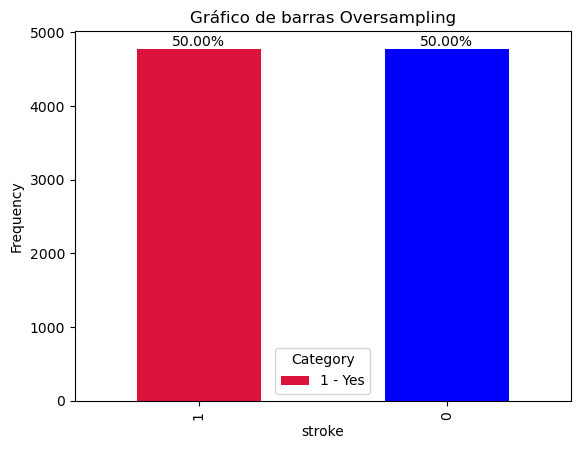

In [183]:
# Importamos Matplotlib
import matplotlib.pyplot as plt
# Calculamos la frecuencia de las clases de la variable objetivo:
stroke = data_o['stroke'].value_counts()
# Creamos un gráfico de barras
ax = stroke.plot(kind='bar', color=['crimson', 'blue', 'red', 'limegreen', 'darkturquoise'])
plt.xlabel('stroke')
plt.ylabel('Frequency')
plt.title('Gráfico de barras Oversampling')
# Agregamos una leyenda
plt.legend(['1 - Yes', '0 - No'], title='Category')
# Agregamos el porcentaje en cada una de las barras
total = len(data_o['stroke'])
for i, value in enumerate(stroke):
    percentage = (value / total) * 100
    ax.text(i, value + 1, f'{percentage:.2f}%', ha='center', va='bottom')
# Montramos cada una de las gráficas
plt.show()

In [184]:
# Por medio de la funciòn len calculamos la longitud de los datos del stoke
len(data_o['stroke'])

9550

Random undersampling

In [185]:
# Importamos las librerìas necesarias
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
# Se define Xi como un DataFrame que contiene todas las características del conjunto de datos excepto la columna 'stroke'.
Xi=datos_hospital_copia.drop('stroke', axis=1)
# Yi se define como la serie que contiene solo la columna 'stroke' del conjunto de datos original.
Yi=datos_hospital_copia['stroke']
# Se realiza un submuestreo aleatorio
u = RandomUnderSampler(sampling_strategy='auto', random_state=67)
X_r, y_r = u.fit_resample(Xi, Yi)
# Imprimimos la frecuencia de clases antes y después del submuestreo:
print('Antes del submuestreo aleatorio:')
print(Yi.value_counts())
print('Después sub muestreo aleatorio')
print(y_r.value_counts())

Antes del submuestreo aleatorio:
stroke
0    4775
1     245
Name: count, dtype: int64
Después sub muestreo aleatorio
stroke
0    245
1    245
Name: count, dtype: int64


In [186]:
# Convertimos arrays de NumPy a un DataFrame de Pandas:
Xs_r = pd.DataFrame(X_r, columns=Xi.columns)
Ys_r = pd.DataFrame(y_r, columns=['stroke'])
# Concatenamos el DataFrem
data_u = pd.concat([Xs_r, Ys_r], axis=1)
# Imprimimos las primeras filas del DataFrame
data_u.head()

,age,avg_glucose_level,bmi,children,male,heart_disease,hypertension,income,married,urban,formerly_smoked,never_smoked,smokes,never_worked,work_private,self_employed,work_children,stroke
2516,31.0,108.56,21.8,3,True,0,0,35300.0,False,False,False,True,False,False,True,False,False,0
528,23.0,79.35,39.4,2,False,0,0,2744.0,True,False,True,False,False,False,True,False,False,0
4756,9.0,110.97,17.7,0,False,0,0,15790.0,False,False,False,False,False,False,False,False,True,0
1384,59.0,246.53,27.2,2,True,1,1,37667.0,True,False,True,False,False,False,True,False,False,0
4016,18.0,112.33,23.2,0,False,0,0,45879.0,False,False,True,False,False,False,False,False,False,0


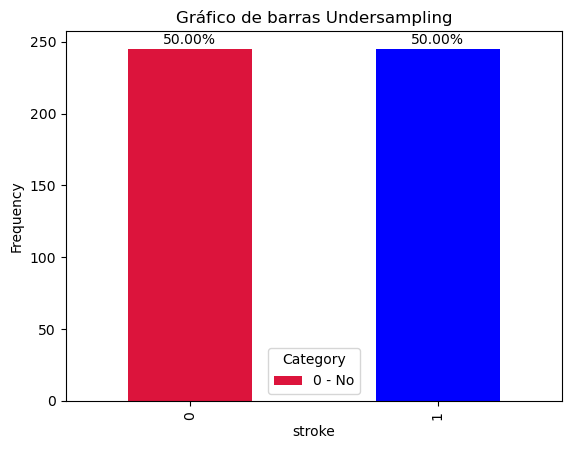

In [187]:
# Importamos la librería
import matplotlib.pyplot as plt
# Calculamos la frecuencia de las clases de la variable objetivo
stroke= data_u['stroke'].value_counts()
# Creamos un gráfico de barras
ax = stroke.plot(kind='bar', color=['crimson', 'blue', 'red', 'limegreen', 'darkturquoise'])
plt.xlabel('stroke')
plt.ylabel('Frequency')
plt.title('Gráfico de barras Undersampling')
# Agregamos las leyendas
plt.legend(['0 - No', '1 - Yes'], title='Category')
# Calulamos y agregamos el porcentaje en las barras
t = len(data_u['stroke'])
for i, value in enumerate(stroke):
    p = (value / t) * 100
    ax.text(i, value + 1, f'{p:.2f}%', ha='center', va='bottom')
# Mostramos la gráfica
plt.show()

In [188]:
# Calculamos la longitud de los datos de la columna stroke
len(data_u['stroke'])

490

NORMALIZAR

In [189]:
# Importamos StandardScaler
from sklearn.preprocessing import StandardScaler
#Separamos las variables X y Y
X3 = datos_hospital_copia.drop('stroke', axis=1)
Y3 = datos_hospital_copia['stroke']
#Seleccionamos las columnas que vamos a normalizar
n = ['avg_glucose_level', 'bmi', 'age','children', 'income']
# Creamos una copia del datafrem
X_n = X3.copy()
# Normalizamos las columnas
scaler = StandardScaler()
X_n[n] = scaler.fit_transform(X_n[n])
# Concatenamos el DataFrem
datos_hospital_copia = pd.concat([X_n, Y3], axis=1)
# Imprimimos el resultado
datos_hospital_copia

,age,avg_glucose_level,bmi,children,male,heart_disease,hypertension,income,married,urban,formerly_smoked,never_smoked,smokes,never_worked,work_private,self_employed,work_children,stroke
0,1.050276,2.708137,1.006794,1.462128,True,1,0,7.049871,True,True,True,False,False,False,True,False,False,1
1,0.785224,2.123102,-0.110118,-1.064220,False,0,0,1.374913,True,False,False,True,False,False,False,True,False,1
2,1.624555,-0.004279,0.474313,1.462128,True,1,0,1.870407,True,False,False,True,False,False,True,False,False,1
3,0.255121,1.438646,0.721072,-0.222104,False,0,0,-1.089628,True,True,False,False,True,False,True,False,False,1
4,1.580380,1.502496,-0.629612,1.462128,False,0,1,-0.793757,True,False,False,True,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,-0.363334,-0.510882,0.227553,0.620012,False,0,0,-0.919248,True,False,False,True,False,False,False,True,False,0
5108,0.343471,1.329504,-0.421815,-1.064220,True,0,0,-0.697438,True,False,True,False,False,False,True,False,False,0
5109,0.034244,-0.460288,-0.343891,-1.064220,False,0,0,-0.450832,True,True,False,False,False,False,False,False,False,0
5110,-0.451684,-0.344739,0.279502,1.462128,False,0,1,-1.132825,True,True,True,False,False,False,False,False,True,0


In [190]:
pip install mord

Note: you may need to restart the kernel to use updated packages.


In [191]:
pip install dmba

Note: you may need to restart the kernel to use updated packages.


In [192]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [193]:
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

# 4. Implemente un algoritmo y estadísticamente pruebe cuál de las dos técnicas mencionadas en el punto 2 mejora la predicción. En la presentación y reporte debe explicar la técnica estadística utilizada.

In [194]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Definir clasificador de la Regresión Logística
clasificador = LogisticRegression()

# Crear pipelines para Random Undersampling y SMOTE con la Regresión Logística
pipeline_undersampling = make_pipeline(RandomUnderSampler(), StandardScaler(), clasificador)
pipeline_smote = make_pipeline(SMOTE(), StandardScaler(), clasificador)

# Realizar validación cruzada para ambos pipelines
score_undersampling = cross_val_score(pipeline_undersampling, Xi, Yi, cv=5, scoring='accuracy')
score_smote = cross_val_score(pipeline_smote, Xi, Yi, cv=5, scoring='accuracy')

# Imprimir los resultados
print("Precisión con la técnica Random Undersampling:", score_undersampling.mean())
print("Precisión con la técnica SMOTE:", score_smote.mean())


Precisión con la técnica Random Undersampling: 0.7312749003984064
Precisión con la técnica SMOTE: 0.8539840637450199


In [195]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel

# Creamos un clasificador RandomForest como ejemplo
c = RandomForestClassifier(random_state=42)

# Calculamos la precisión mediante validación cruzada en los datos originales
accuracies_original = cross_val_score(c, Xi, Yi, cv=5, scoring='accuracy')

# Aplicamos SMOTE y calculamos la precisión mediante validación cruzada
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(Xi, Yi)
accuracies_smote = cross_val_score(c, X_sm, y_sm, cv=5, scoring='accuracy')

# Aplicamos Random Undersampling y calculamos la precisión mediante validación cruzada
undersampler = RandomUnderSampler(random_state=42)
X_r, y_r = undersampler.fit_resample(Xi, Yi)
accuracies_undersampling = cross_val_score(c, X_r, y_r, cv=5, scoring='accuracy')

# Realizamos el test t de Student para comparar las precisiones promedio
t_statistic_smote_original, p_value_smote_original = ttest_rel(accuracies_smote, accuracies_original)
t_statistic_undersampling_original, p_value_undersampling_original = ttest_rel(accuracies_undersampling, accuracies_original)
t_statistic_smote_undersampling, p_value_smote_undersampling = ttest_rel(accuracies_smote, accuracies_undersampling)

print("\nComparación de SMOTE vs. Random Undersampling:")
print("Valor t:", t_statistic_smote_undersampling)
print("Valor p:", p_value_smote_undersampling)


Comparación de SMOTE vs. Random Undersampling:
Valor t: 7.342962166713391
Valor p: 0.0018314286281200412


# 5. Aplique al menos 4 algoritmos en la base de datos utilizando la mejor estrategia de entrenamiento descubierta en el punto 4.

### 5.1 - Al menos 1 algoritmos debe ser un ensamble.

In [196]:
# Importar las librerías necesarias
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Definir Xi como un DataFrame que contiene todas las características del conjunto de datos excepto la columna 'stroke'.
Xi = datos_hospital_copia.drop('stroke', axis=1)
# Definir Yi como la serie que contiene solo la columna 'stroke' del conjunto de datos original.
Yi = datos_hospital_copia['stroke']

# Aplicar SMOTE para abordar el desbalance de clases
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(Xi, Yi)

# Imprimir frecuencia de clases antes y después de aplicar SMOTE
print('Frecuencia de clases antes de SMOTE:')
print(Yi.value_counts())
print('\nFrecuencia de clases después de SMOTE:')
print(y_smote.value_counts())

# Separar los datos en conjuntos de entrenamiento (60%), prueba (20%) y validación (20%)
X_train_rf, X_temp, y_train_rf, y_temp = train_test_split(X_smote, y_smote, test_size=0.4, random_state=42)
X_test_rf, X_val_rf, y_test_rf, y_val_rf = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Entrenar modelo de ensamble (Random Forest, por ejemplo) en los datos de entrenamiento
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# Realizar predicciones en conjunto de prueba
y_pred_test_rf = rf_model.predict(X_test_rf)

# Calcular e imprimir la precisión del modelo en el conjunto de prueba
test_accuracy = accuracy_score(y_test_rf, y_pred_test_rf)
print("\nPrecisión del modelo en el conjunto de prueba:", test_accuracy)


Frecuencia de clases antes de SMOTE:
stroke
0    4775
1     245
Name: count, dtype: int64

Frecuencia de clases después de SMOTE:
stroke
1    4775
0    4775
Name: count, dtype: int64

Precisión del modelo en el conjunto de prueba: 0.9570680628272251


#### 5.2 - Al menos 1 algoritmo debe ser un modelo no visto en clase (debe investigar y entender cómo funciona el modelo y como realiza la predicción, incluya está descripción en la presentación).

In [197]:
# Importar las librerías necesarias
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Definir Xi como un DataFrame que contiene todas las características del conjunto de datos excepto la columna 'stroke'.
Xi = datos_hospital_copia.drop('stroke', axis=1)
# Definir Yi como la serie que contiene solo la columna 'stroke' del conjunto de datos original.
Yi = datos_hospital_copia['stroke']

# Aplicar SMOTE para abordar el desbalance de clases
smote = SMOTE(random_state=42)
X_smote2, y_smote2 = smote.fit_resample(Xi, Yi)

# Imprimir la frecuencia de clases antes y después de aplicar SMOTE
print('Frecuencia de clases antes de SMOTE:')
print(Yi.value_counts())
print('\nFrecuencia de clases después de SMOTE:')
print(y_smote.value_counts())

# Dividir datos en conjuntos de entrenamiento, prueba y validación
X_train_gb, X_temp_gb, y_train_gb, y_temp_gb = train_test_split(X_smote2, y_smote2, test_size=0.4, random_state=42)
X_test_gb, X_val_gb, y_test_gb, y_val_gb = train_test_split(X_temp_gb, y_temp_gb, test_size=0.5, random_state=42)

# Entrenar modelo de Gradient Boosting en los datos de entrenamiento
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train_gb, y_train_gb)

# Realizar predicciones en set de prueba
y_pred_gb = gb_model.predict(X_test_gb)

# Calcular e imprimir la precisión del modelo en el set de prueba
test_accuracy_gb = accuracy_score(y_test_gb, y_pred_gb)
print("\nPrecisión del modelo en el conjunto de prueba:", test_accuracy_gb)


Frecuencia de clases antes de SMOTE:
stroke
0    4775
1     245
Name: count, dtype: int64

Frecuencia de clases después de SMOTE:
stroke
1    4775
0    4775
Name: count, dtype: int64

Precisión del modelo en el conjunto de prueba: 0.8900523560209425


Referencias
* Chat GPT. Como implementar Gradient Boosting Classifier en el siguiente codigo con SMOTE
* Chat GPT. Como corregir diferentes códigos
* Chat GPT. Como sirve train_test_split en Python
* Chat GPT. Como cambiar el tamaño de un grâfico de barras en Python
* Chat GPT. Calcular la precisión de un modelo en Python
* Chat GPT. Como funciona el algoritmo SMOTE en Python
* Baldeon, G. (2024). Presentaciones Analítica de Datos (Segundo Semestre 2023-2024)

### 5.3 Para al menos 2 algoritmos utilice un método de optimización de hiperparámetros. Mencione los rangos en los cuáles se buscó los mejores hiperparámetros.

In [198]:
# Importar DecisionTreeClassifier y GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Aplicar SMOTE y RandomUnderSampler
sm = SMOTE(random_state=42)  # Aplicar SMOTE para balancear las clases
X_sm, y_sm = sm.fit_resample(Xi, Yi)

u = RandomUnderSampler(sampling_strategy='auto', random_state=67)  # Aplicar RandomUnderSampler para balancear las clases
X_r, y_r = u.fit_resample(X_sm, y_sm)

# Crear un clasificador Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Ajustar el modelo de Decision Tree
dt.fit(X_r, y_r)

# Determinar los valores de los hiperparámetros que se desean probar
param_grid_initial = {
    'max_depth': [None, 10, 20, 30, 50],  
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 4, 8],  
}

# Aplica grid search utilizando validación cruzada para medir el error
grid_search_initial = GridSearchCV(estimator=dt, param_grid=param_grid_initial, cv=5)
grid_search_initial.fit(X_r, y_r)

print('Puntuación inicial antés de optimización: ', grid_search_initial.best_score_)
print('Parámetros: ', grid_search_initial.best_params_)

# Devuelve el arbol que tiene la mayor exactitud 
mejor_arbol_decision_inicial = grid_search_initial.best_estimator_

# Calcular y imprimir el puntaje después de la optimización
score_after_optimization = mejor_arbol_decision_inicial.score(X_r, y_r)
print('Puntaje del Decision Tree después de la optimización:', score_after_optimization)


Puntuación inicial antés de optimización:  0.9
Parámetros:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Puntaje del Decision Tree después de la optimización: 0.9992670157068063


In [199]:
# Importar DecisionTreeClassifier y RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Aplicar SMOTE y RandomUnderSampler
sm = SMOTE(random_state=42)  # Aplicar SMOTE para balancear las clases
X_sm, y_sm = sm.fit_resample(Xi, Yi)

u2 = RandomUnderSampler(sampling_strategy='auto', random_state=67)  # Aplicar RandomUnderSampler para balancear las clases
X_r2, y_r2 = u.fit_resample(X_sm, y_sm)

# Crear un clasificador Decision Tree
ad = DecisionTreeClassifier(random_state=42)

# Determinar los rangos de los hiperparámetros que se desean probar
param_dist = {
    'max_depth': [None, 10, 20, 30, 50],  
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 4, 8],  
}

# Aplicar búsqueda aleatoria utilizando validación cruzada para medir el error
random_search = RandomizedSearchCV(
    estimator=ad,
    param_distributions=param_dist,
    n_iter=20,  # Número de combinaciones de hiperparámetros a probar
    cv=5,
    random_state=42
)
random_search.fit(X_r2, y_r2)

print('Mejor puntaje encontrado: ', random_search.best_score_)
print('Mejores parámetros: ', random_search.best_params_)

# Devolver el árbol con los mejores hiperparámetros
mejor_arbol_decision_randomizado = random_search.best_estimator_

# Calcular y imprimir el puntaje después de la optimización
score_after_optimization = mejor_arbol_decision_randomizado.score(X_r2, y_r2)
print('Puntaje del Decision Tree después de la optimización:', score_after_optimization)


Mejor puntaje encontrado:  0.8994764397905758
Mejores parámetros:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Puntaje del Decision Tree después de la optimización: 1.0


### 5.4 Para los hiperparamétros no optimizados de todos los modelos, justifique su valor (lea papers o libros que provean recomendaciones de valores e incluya como referencia en su reporte).

En Random Forest, el hiperparámetro que se utilizó y no optimizó es random_state. Este parámetro controla la aleatoriedad (Chen, 2024, p.270) en el set de entrenamiento del modelo y asegura que los resultados sean reproducibles. Se le da un valor de 42, como una referencia humorística a la novela “The Hitchhiker's Guide to the Galaxy” de Douglas Adams, en donde explica que el número 42 es la respuesta “pregunta fundamental de la vida, el universo y todo lo demás” (Hanna, 2022).

En Gradient Boosting, se utilizó el hiperparámetro no optimizado que es n_estimators. Es fundamental realizar un análisis para calcular el valor óptimo de n_estimators, ya que esto influye en la generalización del modelo. Un método para determinar el mejor valor de n_estimators es Grid Search Cross Validation (Alzuhdi, A., et al, 2023). En nuestro modelo, se utilizó un valor default de 100 árboles. 

# 6. Evalué cada modelo
### 6.1 Calcule la matriz de confusión, exactitud, sensibilidad, especificidad, precisión, AUC y curva ROC para cada algoritmo en el set de entrenamiento, validación y prueba. 

RANDOM FOREST

Matriz de Confusión en el conjunto de entrenamiento:
[[2828    0]
 [   0 2902]]
El valor de AUC en el conjunto de entrenamiento es: 1.0


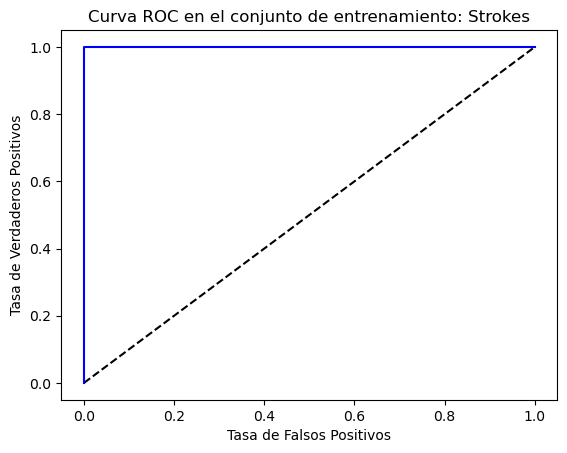

Reporte de Clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2828
           1       1.00      1.00      1.00      2902

    accuracy                           1.00      5730
   macro avg       1.00      1.00      1.00      5730
weighted avg       1.00      1.00      1.00      5730



In [229]:
#Set Entrenamiento

from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report

# Predicciones en conjunto de entrenamiento
y_pred_train_rf = rf_model.predict(X_train_rf)

# Matriz de confusión con Random Forest en el conjunto de entrenamiento
conf_matrix_rf_train = confusion_matrix(y_train_rf, y_pred_train_rf)
print("Matriz de Confusión en el conjunto de entrenamiento:")
print(conf_matrix_rf_train)

# Puntuación AUC en el conjunto de entrenamiento
y_pred_probs_train_rf = rf_model.predict_proba(X_train_rf)[:, 1]
auc_rf_train = roc_auc_score(y_train_rf, y_pred_probs_train_rf)
print('El valor de AUC en el conjunto de entrenamiento es:', auc_rf_train)

# Curva ROC en el conjunto de entrenamiento
fpr_rf_train, tpr_rf_train, thresholds_rf_train = roc_curve(y_train_rf, y_pred_probs_train_rf)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_train, tpr_rf_train, color="blue")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC en el conjunto de entrenamiento: Strokes')
plt.show()

# Reporte de clasificación en el conjunto de entrenamiento
print("Reporte de Clasificación en el conjunto de entrenamiento:")
print(classification_report(y_train_rf, y_pred_train_rf))


In [202]:
# Calcula la exactitud
exactitud = accuracy_score(y_train_rf, y_pred_train_rf)

# Calcula la precisión
precision = precision_score(y_train_rf, y_pred_train_rf, pos_label = 1)
precision_ns = precision_score(y_train_rf, y_pred_train_rf, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_train_rf, y_pred_train_rf, pos_label = 1)
sensibilidad_ns = recall_score(y_train_rf, y_pred_train_rf, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_train_rf, y_pred_train_rf, pos_label = 0)
especificidad_ns = recall_score(y_train_rf, y_pred_train_rf, pos_label = 1)

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud))
print("Precisión 'Stroke':            {:.2%}".format(precision))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns))

Exactitud:                     100.00%
Precisión 'Stroke':            100.00%
Precisión 'Non Stroke':        100.00%
Sensibilidad 'Stroke':         100.00%
Sensibilidad 'Non Stroke':     100.00%
Especificidad 'Stroke':        100.00%
Especificidad 'Non Stroke':    100.00%


Matriz de Confusión en el conjunto de prueba:
[[924  59]
 [ 23 904]]
El valor de AUC en el conjunto de prueba es: 0.9942358827137936


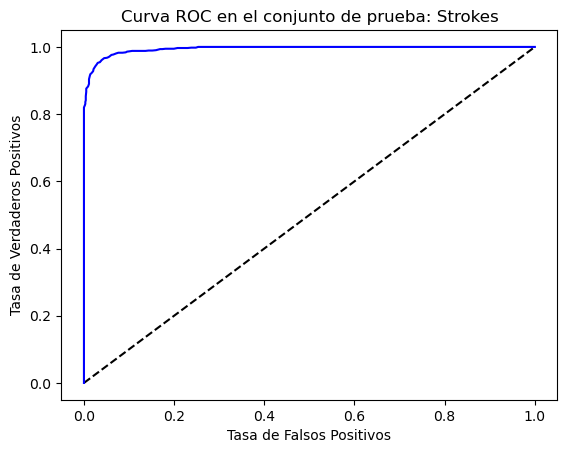

Reporte de Clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       983
           1       0.94      0.98      0.96       927

    accuracy                           0.96      1910
   macro avg       0.96      0.96      0.96      1910
weighted avg       0.96      0.96      0.96      1910



In [203]:
# Set prueba

# Matriz de confusión con Random Forest en el conjunto de prueba
conf_matrix_rf_test = confusion_matrix(y_test_rf, y_pred_test_rf)
print("Matriz de Confusión en el conjunto de prueba:")
print(conf_matrix_rf_test)

# Puntuación AUC en el conjunto de prueba
y_pred_probs_test_rf = rf_model.predict_proba(X_test_rf)[:, 1]
auc_rf_test = roc_auc_score(y_test_rf, y_pred_probs_test_rf)
print('El valor de AUC en el conjunto de prueba es:', auc_rf_test)

# Curva ROC en el conjunto de prueba
fpr_rf_test, tpr_rf_test, thresholds_rf_test = roc_curve(y_test_rf, y_pred_probs_test_rf)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_test, tpr_rf_test, color="blue")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC en el conjunto de prueba: Strokes')
plt.show()

# Reporte de clasificación en el conjunto de prueba
print("Reporte de Clasificación en el conjunto de prueba:")
print(classification_report(y_test_rf, y_pred_test_rf))


In [204]:
# Calcula la exactitud
exactitud = accuracy_score(y_test_rf, y_pred_test_rf)

# Calcula la precisión
precision = precision_score(y_test_rf, y_pred_test_rf, pos_label = 1)
precision_ns = precision_score(y_test_rf, y_pred_test_rf, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_test_rf, y_pred_test_rf, pos_label = 1)
sensibilidad_ns = recall_score(y_test_rf, y_pred_test_rf, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_test_rf, y_pred_test_rf, pos_label = 0)
especificidad_ns = recall_score(y_test_rf, y_pred_test_rf, pos_label = 1)

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud))
print("Precisión 'Stroke':            {:.2%}".format(precision))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns))

Exactitud:                     95.71%
Precisión 'Stroke':            93.87%
Precisión 'Non Stroke':        97.57%
Sensibilidad 'Stroke':         97.52%
Sensibilidad 'Non Stroke':     94.00%
Especificidad 'Stroke':        94.00%
Especificidad 'Non Stroke':    97.52%


Matriz de Confusión en el conjunto de validación:
[[884  80]
 [ 21 925]]
El valor de AUC en el conjunto de validación es: 0.990878825892818


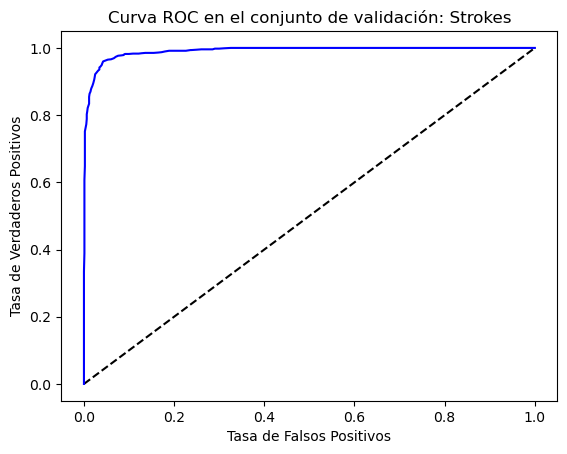

Reporte de Clasificación en el conjunto de validación:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       964
           1       0.92      0.98      0.95       946

    accuracy                           0.95      1910
   macro avg       0.95      0.95      0.95      1910
weighted avg       0.95      0.95      0.95      1910



In [205]:
# Set validacion

# Predicciones en conjunto de validación
y_pred_val_rf = rf_model.predict(X_val_rf)

# Matriz de confusión con Random Forest en el conjunto de validación
conf_matrix_rf_val = confusion_matrix(y_val_rf, y_pred_val_rf)
print("Matriz de Confusión en el conjunto de validación:")
print(conf_matrix_rf_val)

# Puntuación AUC en el conjunto de validación
y_pred_probs_val_rf = rf_model.predict_proba(X_val_rf)[:, 1]
auc_rf_val = roc_auc_score(y_val_rf, y_pred_probs_val_rf)
print('El valor de AUC en el conjunto de validación es:', auc_rf_val)

# Curva ROC en el conjunto de validación
fpr_rf_val, tpr_rf_val, thresholds_rf_val = roc_curve(y_val_rf, y_pred_probs_val_rf)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf_val, tpr_rf_val, color="blue")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC en el conjunto de validación: Strokes')
plt.show()

# Reporte de clasificación en el conjunto de validación
print("Reporte de Clasificación en el conjunto de validación:")
print(classification_report(y_val_rf, y_pred_val_rf))


In [206]:
# Calcula la exactitud
exactitud = accuracy_score(y_val_rf, y_pred_val_rf)

# Calcula la precisión
precision = precision_score(y_val_rf, y_pred_val_rf, pos_label = 1)
precision_ns = precision_score(y_val_rf, y_pred_val_rf, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_val_rf, y_pred_val_rf, pos_label = 1)
sensibilidad_ns = recall_score(y_val_rf, y_pred_val_rf, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_val_rf, y_pred_val_rf, pos_label = 0)
especificidad_ns = recall_score(y_val_rf, y_pred_val_rf, pos_label = 1)

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud))
print("Precisión 'Stroke':            {:.2%}".format(precision))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns))

Exactitud:                     94.71%
Precisión 'Stroke':            92.04%
Precisión 'Non Stroke':        97.68%
Sensibilidad 'Stroke':         97.78%
Sensibilidad 'Non Stroke':     91.70%
Especificidad 'Stroke':        91.70%
Especificidad 'Non Stroke':    97.78%


GRADIENT BOOSTING CLASSIFIER

Matriz de Confusión en el conjunto de entrenamiento:
[[2455  373]
 [ 158 2744]]
El valor de AUC en el conjunto de entrenamiento es: 0.9726448837411061


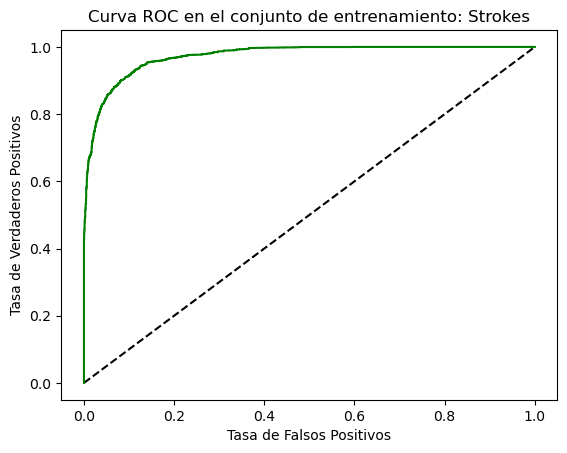

Reporte de Clasificación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2828
           1       0.88      0.95      0.91      2902

    accuracy                           0.91      5730
   macro avg       0.91      0.91      0.91      5730
weighted avg       0.91      0.91      0.91      5730



In [207]:
# Set entrenamiento 

# Predicciones en conjunto de entrenamiento
y_pred_train_gb = gb_model.predict(X_train_gb)

# Matriz de confusión con Gradient Boosting en el conjunto de entrenamiento
conf_matrix_gb_train = confusion_matrix(y_train_gb, y_pred_train_gb)
print("Matriz de Confusión en el conjunto de entrenamiento:")
print(conf_matrix_gb_train)

# Puntuación AUC en el conjunto de entrenamiento
y_pred_probs_train_gb = gb_model.predict_proba(X_train_gb)[:, 1]
auc_gb_train = roc_auc_score(y_train_gb, y_pred_probs_train_gb)
print('El valor de AUC en el conjunto de entrenamiento es:', auc_gb_train)

# Curva ROC en el conjunto de entrenamiento
fpr_gb_train, tpr_gb_train, thresholds_gb_train = roc_curve(y_train_gb, y_pred_probs_train_gb)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb_train, tpr_gb_train, color="green")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC en el conjunto de entrenamiento: Strokes')
plt.show()

# Reporte de clasificación en el conjunto de entrenamiento
print("Reporte de Clasificación en el conjunto de entrenamiento:")
print(classification_report(y_train_gb, y_pred_train_gb))


In [208]:
# Calcula la exactitud
exactitud = accuracy_score(y_train_gb, y_pred_train_gb)

# Calcula la precisión
precision = precision_score(y_train_gb, y_pred_train_gb, pos_label = 1)
precision_ns = precision_score(y_train_gb, y_pred_train_gb, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_train_gb, y_pred_train_gb, pos_label = 1)
sensibilidad_ns = recall_score(y_train_gb, y_pred_train_gb, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_train_gb, y_pred_train_gb, pos_label = 0)
especificidad_ns = recall_score(y_train_gb, y_pred_train_gb, pos_label = 1)

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud))
print("Precisión 'Stroke':            {:.2%}".format(precision))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns))

Exactitud:                     90.73%
Precisión 'Stroke':            88.03%
Precisión 'Non Stroke':        93.95%
Sensibilidad 'Stroke':         94.56%
Sensibilidad 'Non Stroke':     86.81%
Especificidad 'Stroke':        86.81%
Especificidad 'Non Stroke':    94.56%


Matriz de Confusión en el conjunto de prueba:
[[846 137]
 [ 73 854]]
El valor de AUC en el conjunto de prueba es: 0.9655497283375089


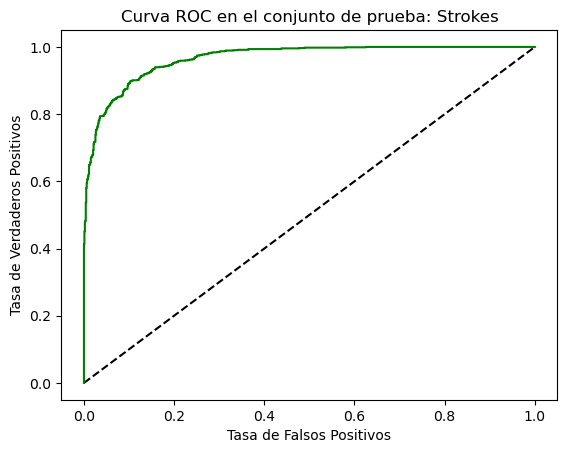

Reporte de Clasificación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       983
           1       0.86      0.92      0.89       927

    accuracy                           0.89      1910
   macro avg       0.89      0.89      0.89      1910
weighted avg       0.89      0.89      0.89      1910



In [209]:
# Set prueba

# Predicciones en conjunto de prueba
y_pred_test_gb = gb_model.predict(X_test_gb)

# Matriz de confusión con Gradient Boosting en el conjunto de prueba
conf_matrix_gb_test = confusion_matrix(y_test_gb, y_pred_test_gb)
print("Matriz de Confusión en el conjunto de prueba:")
print(conf_matrix_gb_test)

# Puntuación AUC en el conjunto de prueba
y_pred_probs_test_gb = gb_model.predict_proba(X_test_gb)[:, 1]
auc_gb_test = roc_auc_score(y_test_gb, y_pred_probs_test_gb)
print('El valor de AUC en el conjunto de prueba es:', auc_gb_test)

# Curva ROC en el conjunto de prueba
fpr_gb_test, tpr_gb_test, thresholds_gb_test = roc_curve(y_test_gb, y_pred_probs_test_gb)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_gb_test, tpr_gb_test, color="green")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC en el conjunto de prueba: Strokes')
plt.show()

# Reporte de clasificación en el conjunto de prueba
print("Reporte de Clasificación en el conjunto de prueba:")
print(classification_report(y_test_gb, y_pred_test_gb))


In [210]:
# Calcula la exactitud
exactitud = accuracy_score(y_test_gb, y_pred_test_gb)

# Calcula la precisión
precision = precision_score(y_test_gb, y_pred_test_gb, pos_label = 1)
precision_ns = precision_score(y_test_gb, y_pred_test_gb, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_test_gb, y_pred_test_gb, pos_label = 1)
sensibilidad_ns = recall_score(y_test_gb, y_pred_test_gb, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_test_gb, y_pred_test_gb, pos_label = 0)
especificidad_ns = recall_score(y_test_gb, y_pred_test_gb, pos_label = 1)

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud))
print("Precisión 'Stroke':            {:.2%}".format(precision))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns))

Exactitud:                     89.01%
Precisión 'Stroke':            86.18%
Precisión 'Non Stroke':        92.06%
Sensibilidad 'Stroke':         92.13%
Sensibilidad 'Non Stroke':     86.06%
Especificidad 'Stroke':        86.06%
Especificidad 'Non Stroke':    92.13%


Matriz de Confusión:
[[820 144]
 [ 61 885]]
El valor de AUC es: 0.9622745475599378


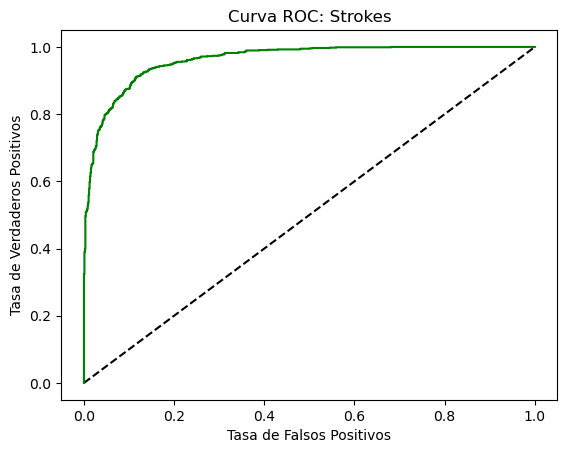

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       964
           1       0.86      0.94      0.90       946

    accuracy                           0.89      1910
   macro avg       0.90      0.89      0.89      1910
weighted avg       0.90      0.89      0.89      1910



In [211]:
# Set validacion

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Predicción en el conjunto de validacion
y_pred_val_gb = gb_model.predict(X_val_gb)

# Matriz de confusión con Gradient Boosting
conf_matrix = confusion_matrix(y_val_gb, y_pred_val_gb)
print("Matriz de Confusión:")
print(conf_matrix)

# Puntuación AUC
y_pred_probs_val_gb = gb_model.predict_proba(X_val_gb)[:, 1]
auc_gb = roc_auc_score(y_val_gb, y_pred_probs_val_gb)
print('El valor de AUC es:', auc_gb)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_val_gb, y_pred_probs_val_gb)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color="green")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC: Strokes')
plt.show()

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_val_gb, y_pred_val_gb))


In [212]:
# Calcula la exactitud
exactitud = accuracy_score(y_val_gb, y_pred_val_gb)

# Calcula la precisión
precision = precision_score(y_val_gb, y_pred_val_gb, pos_label = 1)
precision_ns = precision_score(y_val_gb, y_pred_val_gb, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_val_gb, y_pred_val_gb, pos_label = 1)
sensibilidad_ns = recall_score(y_val_gb, y_pred_val_gb, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_val_gb, y_pred_val_gb, pos_label = 0)
especificidad_ns = recall_score(y_val_gb, y_pred_val_gb, pos_label = 1)

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud))
print("Precisión 'Stroke':            {:.2%}".format(precision))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns))

Exactitud:                     89.27%
Precisión 'Stroke':            86.01%
Precisión 'Non Stroke':        93.08%
Sensibilidad 'Stroke':         93.55%
Sensibilidad 'Non Stroke':     85.06%
Especificidad 'Stroke':        85.06%
Especificidad 'Non Stroke':    93.55%


ARBOLES DE DECISION - GRID SEARCH

Matriz de Confusión en conjunto de entrenamiento:
[[4768    7]
 [   0 4775]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4775
           1       1.00      1.00      1.00      4775

    accuracy                           1.00      9550
   macro avg       1.00      1.00      1.00      9550
weighted avg       1.00      1.00      1.00      9550

El valor AUC en conjunto de entrenamiento es:  0.9999922151256818
El valor AUC es:  0.9999922151256818


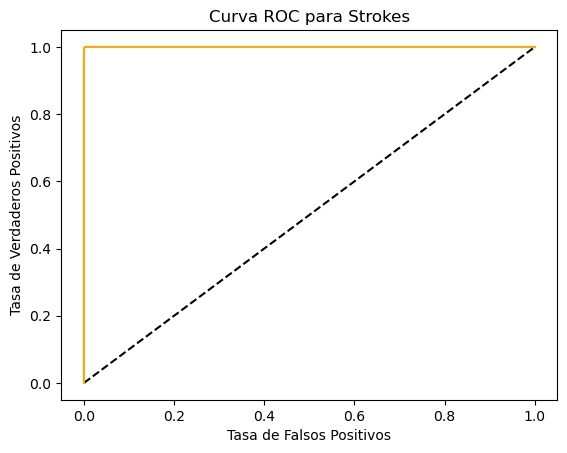

In [224]:
#Set entrenamiento

# Realizar predicciones en el conjunto de entrenamiento con el mejor modelo encontrado
y_pred_train = mejor_arbol_decision_inicial.predict(X_r)

# Calcular la matriz de confusión 
conf_matrix_train = confusion_matrix(y_r, y_pred_train)
print("Matriz de Confusión en conjunto de entrenamiento:")
print(conf_matrix_train)
print(classification_report(y_r, y_pred_train))

# Calcular el AUC-ROC
y_pred_probs_train = mejor_arbol_decision_inicial.predict_proba(X_r)[:, 1]
auc_train = roc_auc_score(y_r, y_pred_probs_train)
print('El valor AUC en conjunto de entrenamiento es: ', auc_train)

# Calcular el AUC-ROC para evaluar el rendimiento del modelo
y_pred_probs_dt = mejor_arbol_decision_inicial.predict_proba(X_smote)[:, 1]
auc_dt = roc_auc_score(y_smote, y_pred_probs_dt)
print('El valor AUC es: ', auc_dt)

# Generar la curva ROC
fpr, tpr, thresholds = roc_curve(y_smote, y_pred_probs_dt)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color="orange")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Strokes')
plt.show()


In [226]:
# Calcula la exactitud
exactitud = accuracy_score(y_r, y_pred_train)

# Calcula la precisión
precision = precision_score(y_r, y_pred_train, pos_label = 1)
precision_ns = precision_score(y_r, y_pred_train, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_r, y_pred_train, pos_label = 1)
sensibilidad_ns = recall_score(y_r, y_pred_train, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_r, y_pred_train, pos_label = 0)
especificidad_ns = recall_score(y_r, y_pred_train, pos_label = 1)

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud))
print("Precisión 'Stroke':            {:.2%}".format(precision))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns))

Exactitud:                     99.93%
Precisión 'Stroke':            99.85%
Precisión 'Non Stroke':        100.00%
Sensibilidad 'Stroke':         100.00%
Sensibilidad 'Non Stroke':     99.85%
Especificidad 'Stroke':        99.85%
Especificidad 'Non Stroke':    100.00%


Matriz de Confusión en conjunto de prueba:
[[932  13]
 [945   0]]
              precision    recall  f1-score   support

           0       0.50      0.99      0.66       945
           1       0.00      0.00      0.00       945

    accuracy                           0.49      1890
   macro avg       0.25      0.49      0.33      1890
weighted avg       0.25      0.49      0.33      1890

El valor AUC en conjunto de prueba es:  0.4931216931216931


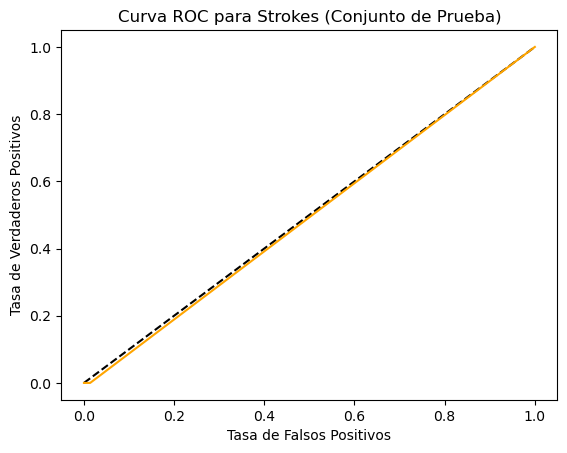

In [227]:
# Set Prueba

from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Aplicar SMOTE al conjunto de prueba
X_sm_test, y_sm_test = SMOTE().fit_resample(X_test, y_test)

# Aplicar RandomOverSampler al conjunto de prueba con SMOTE
X_r_test, y_r_test = RandomOverSampler().fit_resample(X_sm_test, y_sm_test)

# Realizar predicciones en el conjunto de prueba con el mejor modelo encontrado
y_pred_test = mejor_arbol_decision_inicial.predict(X_r_test)

# Calcular la matriz de confusión y el reporte de clasificación
conf_matrix_test = confusion_matrix(y_r_test, y_pred_test)
print("Matriz de Confusión en conjunto de prueba:")
print(conf_matrix_test)
print(classification_report(y_r_test, y_pred_test))

# Calcular el AUC-ROC
y_pred_probs_test = mejor_arbol_decision_inicial.predict_proba(X_r_test)[:, 1]
auc_test = roc_auc_score(y_r_test, y_pred_probs_test)
print('El valor AUC en conjunto de prueba es: ', auc_test)

# Generar la curva ROC para el conjunto de prueba
fpr_test, tpr_test, thresholds_test = roc_curve(y_r_test, y_pred_probs_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_test, tpr_test, color="orange")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Strokes (Conjunto de Prueba)')
plt.show()


In [228]:
# Calcula la exactitud
exactitud = accuracy_score(y_r_test, y_pred_test)

# Calcula la precisión
precision = precision_score(y_r_test, y_pred_test, pos_label = 1)
precision_ns = precision_score(y_r_test, y_pred_test, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_r_test, y_pred_test, pos_label = 1)
sensibilidad_ns = recall_score(y_r_test, y_pred_test, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_r_test, y_pred_test, pos_label = 0)
especificidad_ns = recall_score(y_r_test, y_pred_test, pos_label = 1)

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud))
print("Precisión 'Stroke':            {:.2%}".format(precision))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns))

Exactitud:                     49.31%
Precisión 'Stroke':            0.00%
Precisión 'Non Stroke':        49.65%
Sensibilidad 'Stroke':         0.00%
Sensibilidad 'Non Stroke':     98.62%
Especificidad 'Stroke':        98.62%
Especificidad 'Non Stroke':    0.00%


Matriz de Confusión en conjunto de validación:
[[945  11]
 [956   0]]
              precision    recall  f1-score   support

           0       0.50      0.99      0.66       956
           1       0.00      0.00      0.00       956

    accuracy                           0.49      1912
   macro avg       0.25      0.49      0.33      1912
weighted avg       0.25      0.49      0.33      1912

El valor AUC en conjunto de validación es:  0.4942468619246862


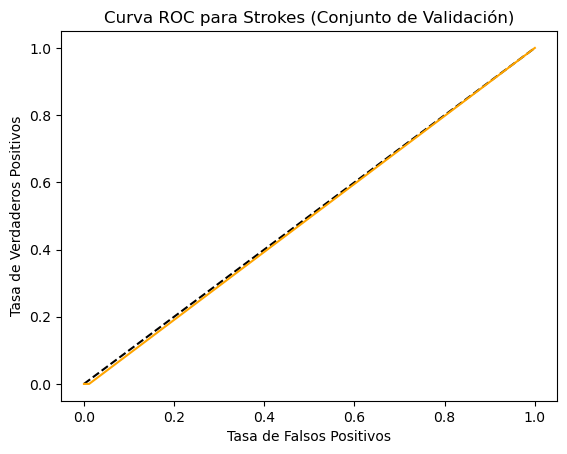

In [217]:
# Set validacion

from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Aplicar SMOTE al conjunto de validación
X_sm_val, y_sm_val = SMOTE().fit_resample(X_val, y_val)

# Aplicar RandomOverSampler al conjunto de validación con SMOTE
X_r_val, y_r_val = RandomOverSampler().fit_resample(X_sm_val, y_sm_val)

# Realizar predicciones en el conjunto de validación con el mejor modelo encontrado
y_pred_val = mejor_arbol_decision_inicial.predict(X_r_val)

# Calcular la matriz de confusión y el reporte de clasificación
conf_matrix_val = confusion_matrix(y_r_val, y_pred_val)
print("Matriz de Confusión en conjunto de validación:")
print(conf_matrix_val)
print(classification_report(y_r_val, y_pred_val))

# Calcular el AUC-ROC
y_pred_probs_val = mejor_arbol_decision_inicial.predict_proba(X_r_val)[:, 1]
auc_val = roc_auc_score(y_r_val, y_pred_probs_val)
print('El valor AUC en conjunto de validación es: ', auc_val)

# Generar la curva ROC para el conjunto de validación
fpr_val, tpr_val, thresholds_val = roc_curve(y_r_val, y_pred_probs_val)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_val, tpr_val, color="orange")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Strokes (Conjunto de Validación)')
plt.show()


In [218]:
# Calcula la exactitud
exactitud = accuracy_score(y_r_val, y_pred_val)

# Calcula la precisión
precision = precision_score(y_r_val, y_pred_val, pos_label = 1)
precision_ns = precision_score(y_r_val, y_pred_val, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_r_val, y_pred_val, pos_label = 1)
sensibilidad_ns = recall_score(y_r_val, y_pred_val, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_r_val, y_pred_val, pos_label = 0)
especificidad_ns = recall_score(y_r_val, y_pred_val, pos_label = 1)

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud))
print("Precisión 'Stroke':            {:.2%}".format(precision))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns))

Exactitud:                     49.42%
Precisión 'Stroke':            0.00%
Precisión 'Non Stroke':        49.71%
Sensibilidad 'Stroke':         0.00%
Sensibilidad 'Non Stroke':     98.85%
Especificidad 'Stroke':        98.85%
Especificidad 'Non Stroke':    0.00%


ARBOLES DE DECISION - RANDOMIZED SEARCH

Mejor puntaje encontrado:  0.8993121816426406
Mejores parámetros:  {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Matriz de Confusión en el conjunto de entrenamiento:
[[3053    0]
 [   0 3075]]
El valor AUC en el conjunto de entrenamiento es:  1.0


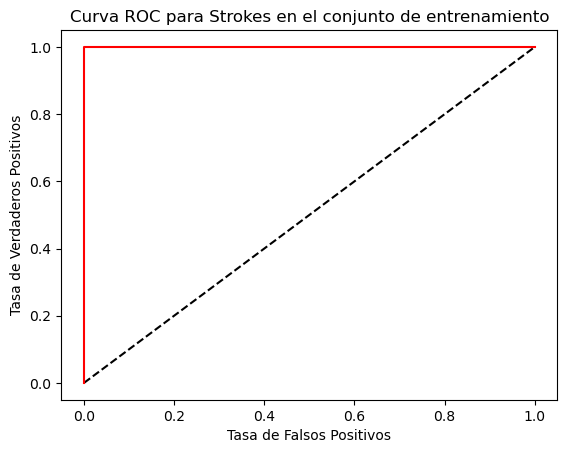

Matriz de Confusión en el conjunto de prueba:
[[839 106]
 [ 36  23]]
El valor AUC en el conjunto de prueba es:  0.6388305981526321


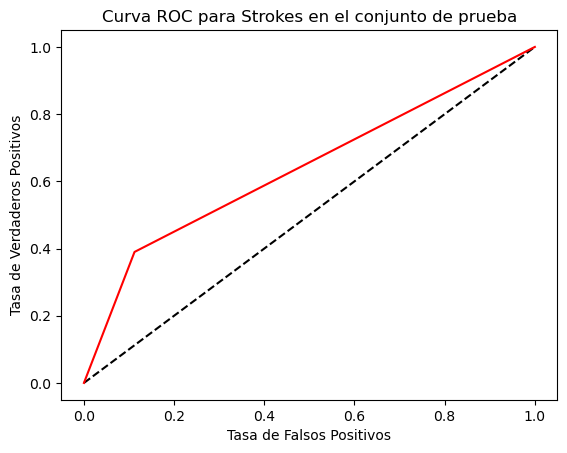

Matriz de Confusión en el conjunto de validación:
[[691  86]
 [ 40 715]]
El valor AUC en el conjunto de validación es:  0.9181688784337791


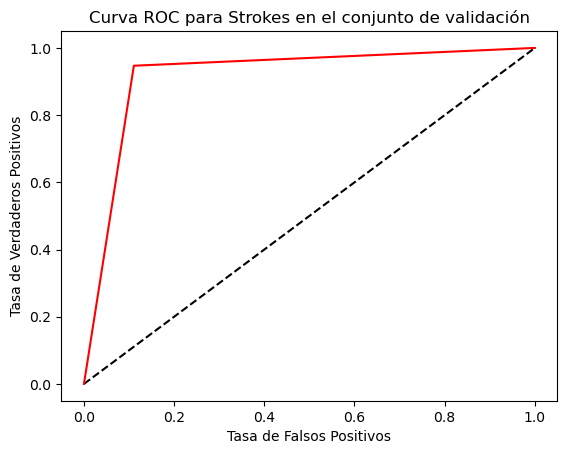

In [219]:
#Set entrenamiento, prueba y validacion

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import RandomizedSearchCV

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(Xi, Yi, test_size=0.2, random_state=42)

# Aplicar SMOTE y RandomUnderSampler solo al conjunto de entrenamiento
sm_rs = SMOTE(random_state=42)
X_train_resampled_rs, y_train_resampled_rs = sm_rs.fit_resample(X_train_rs, y_train_rs)

u_rs = RandomUnderSampler(sampling_strategy='auto', random_state=67)
X_train_resampled_rs, y_train_resampled_rs = u_rs.fit_resample(X_train_resampled_rs, y_train_resampled_rs)

# Dividir el conjunto de entrenamiento resampleado en conjuntos de entrenamiento y validación
X_train_resampled_rs, X_val_rs, y_train_resampled_rs, y_val_rs = train_test_split(X_train_resampled_rs, y_train_resampled_rs, test_size=0.2, random_state=42)

# Crear un clasificador Decision Tree
dt_rs = DecisionTreeClassifier(random_state=42)

# Determinar los rangos de los hiperparámetros que se desean probar
param_dist = {
    'max_depth': [None, 10, 20, 30, 50],  
    'min_samples_split': [2, 5, 10, 20],  
    'min_samples_leaf': [1, 2, 4, 8],  
}

# Aplicar búsqueda aleatoria utilizando validación cruzada para medir el error
random_search = RandomizedSearchCV(
    estimator=dt_rs,
    param_distributions=param_dist,
    n_iter=20,  # Número de combinaciones de hiperparámetros a probar
    cv=5,
    random_state=42
)
random_search.fit(X_train_resampled_rs, y_train_resampled_rs)

print('Mejor puntaje encontrado: ', random_search.best_score_)
print('Mejores parámetros: ', random_search.best_params_)

# Devolver el árbol con los mejores hiperparámetros
mejor_arbol_decision_randomizado_rs = random_search.best_estimator_

# Calcular las predicciones en el conjunto de entrenamiento
y_pred_train_rs = mejor_arbol_decision_randomizado_rs.predict(X_train_resampled_rs)

# Calcular la matriz de confusión en el conjunto de entrenamiento
conf_matrix_train_rs = confusion_matrix(y_train_resampled_rs, y_pred_train_rs)
print("Matriz de Confusión en el conjunto de entrenamiento:")
print(conf_matrix_train_rs)

# Calcular las probabilidades de predicción en el conjunto de entrenamiento
y_pred_probs_train_rs = mejor_arbol_decision_randomizado_rs.predict_proba(X_train_resampled_rs)[:, 1]

# Calcular el AUC-ROC en el conjunto de entrenamiento
auc_train_rs = roc_auc_score(y_train_resampled_rs, y_pred_probs_train_rs)
print('El valor AUC en el conjunto de entrenamiento es: ', auc_train_rs)

# Calcular la curva ROC en el conjunto de entrenamiento
fpr_train_rs, tpr_train_rs, thresholds_train_rs = roc_curve(y_train_resampled_rs, y_pred_probs_train_rs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train_rs, tpr_train_rs, color="red")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Strokes en el conjunto de entrenamiento')
plt.show()

# Calcular las predicciones en el conjunto de prueba
y_pred_test_rs = mejor_arbol_decision_randomizado_rs.predict(X_test_rs)

# Calcular la matriz de confusión en el conjunto de prueba
conf_matrix_test_rs = confusion_matrix(y_test_rs, y_pred_test_rs)
print("Matriz de Confusión en el conjunto de prueba:")
print(conf_matrix_test_rs)

# Calcular las probabilidades de predicción en el conjunto de prueba
y_pred_probs_test_rs = mejor_arbol_decision_randomizado_rs.predict_proba(X_test_rs)[:, 1]

# Calcular el AUC-ROC en el conjunto de prueba
auc_test_rs = roc_auc_score(y_test_rs, y_pred_probs_test_rs)
print('El valor AUC en el conjunto de prueba es: ', auc_test_rs)

# Calcular la curva ROC en el conjunto de prueba
fpr_test_rs, tpr_test_rs, thresholds_test_rs = roc_curve(y_test_rs, y_pred_probs_test_rs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_test_rs, tpr_test_rs, color="red")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Strokes en el conjunto de prueba')
plt.show()

# Calcular las predicciones en el conjunto de validación
y_pred_val_rs = mejor_arbol_decision_randomizado_rs.predict(X_val_rs)

# Calcular la matriz de confusión en el conjunto de validación
conf_matrix_val_rs = confusion_matrix(y_val_rs, y_pred_val_rs)
print("Matriz de Confusión en el conjunto de validación:")
print(conf_matrix_val_rs)

# Calcular las probabilidades de predicción en el conjunto de validación
y_pred_probs_val_rs = mejor_arbol_decision_randomizado_rs.predict_proba(X_val_rs)[:, 1]

# Calcular el AUC-ROC en el conjunto de validación
auc_val_rs = roc_auc_score(y_val_rs, y_pred_probs_val_rs)
print('El valor AUC en el conjunto de validación es: ', auc_val_rs)

# Calcular la curva ROC en el conjunto de validación
fpr_val_rs, tpr_val_rs, thresholds_val_rs = roc_curve(y_val_rs, y_pred_probs_val_rs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_val_rs, tpr_val_rs, color="red")
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC para Strokes en el conjunto de validación')
plt.show()


In [220]:
# Calcula la exactitud
exactitud = accuracy_score(y_train_resampled_rs, y_pred_train_rs)

# Calcula la precisión
precision = precision_score(y_train_resampled_rs, y_pred_train_rs, pos_label=1)
precision_ns = precision_score(y_train_resampled_rs, y_pred_train_rs, pos_label=0)

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_train_resampled_rs, y_pred_train_rs, pos_label=1)
sensibilidad_ns = recall_score(y_train_resampled_rs, y_pred_train_rs, pos_label=0)

# Calcula la especificidad
especificidad = recall_score(y_train_resampled_rs, y_pred_train_rs, pos_label=0)
especificidad_ns = recall_score(y_train_resampled_rs, y_pred_train_rs, pos_label=1)

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud))
print("Precisión 'Stroke':            {:.2%}".format(precision))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns))


Exactitud:                     100.00%
Precisión 'Stroke':            100.00%
Precisión 'Non Stroke':        100.00%
Sensibilidad 'Stroke':         100.00%
Sensibilidad 'Non Stroke':     100.00%
Especificidad 'Stroke':        100.00%
Especificidad 'Non Stroke':    100.00%


In [221]:
#Prueba

# Calcula la exactitud
exactitud = accuracy_score(y_test_rs, y_pred_test_rs)

# Calcula la precisión
precision = precision_score(y_test_rs, y_pred_test_rs, pos_label = 1)
precision_ns = precision_score(y_test_rs, y_pred_test_rs, pos_label= 0 )

# Calcula la sensibilidad (recall)
sensibilidad = recall_score(y_test_rs, y_pred_test_rs, pos_label = 1)
sensibilidad_ns = recall_score(y_test_rs, y_pred_test_rs, pos_label = 0)

# Calcula la especificidad
especificidad = recall_score(y_test_rs, y_pred_test_rs, pos_label = 0)
especificidad_ns = recall_score(y_test_rs, y_pred_test_rs, pos_label = 1)

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud))
print("Precisión 'Stroke':            {:.2%}".format(precision))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns))

Exactitud:                     85.86%
Precisión 'Stroke':            17.83%
Precisión 'Non Stroke':        95.89%
Sensibilidad 'Stroke':         38.98%
Sensibilidad 'Non Stroke':     88.78%
Especificidad 'Stroke':        88.78%
Especificidad 'Non Stroke':    38.98%


In [222]:
#Validacion

# Calcular la exactitud 
exactitud_val = accuracy_score(y_val_rs, y_pred_probs_val_rs)

# Calcular la precisión 
precision_val = precision_score(y_val_rs, y_pred_probs_val_rs, pos_label=1)
precision_ns_val = precision_score(y_val_rs, y_pred_probs_val_rs, pos_label=0)

# Calcular la sensibilidad (recall) 
sensibilidad_val = recall_score(y_val_rs, y_pred_probs_val_rs, pos_label=1)
sensibilidad_ns_val = recall_score(y_val_rs, y_pred_probs_val_rs, pos_label=0)

# Calcular la especificidad 
especificidad_val = recall_score(y_val_rs, y_pred_probs_val_rs, pos_label=0)
especificidad_ns_val = recall_score(y_val_rs, y_pred_probs_val_rs, pos_label=1)  # Invertir las etiquetas

# Resultados
print("Exactitud:                     {:.2%}".format(exactitud_val))
print("Precisión 'Stroke':            {:.2%}".format(precision_val))
print("Precisión 'Non Stroke':        {:.2%}".format(precision_ns_val))
print("Sensibilidad 'Stroke':         {:.2%}".format(sensibilidad_val))
print("Sensibilidad 'Non Stroke':     {:.2%}".format(sensibilidad_ns_val))
print("Especificidad 'Stroke':        {:.2%}".format(especificidad_val))
print("Especificidad 'Non Stroke':    {:.2%}".format(especificidad_ns_val))



Exactitud:                     91.78%
Precisión 'Stroke':            89.26%
Precisión 'Non Stroke':        94.53%
Sensibilidad 'Stroke':         94.70%
Sensibilidad 'Non Stroke':     88.93%
Especificidad 'Stroke':        88.93%
Especificidad 'Non Stroke':    94.70%


**Referencias:**
    
* Baldeon, G. (2024). Presentaciones Analítica de Datos (Segundo Semestre 2023-2024)
* ChatGPT. Correcciones de errores en los códigos.
* ChatGPT. Crear códigos de algunas métricas reemplazando valores previos.
* ChatGPT. Uso de RandomUnderSampler y Matriz de Confusión.

### 6.2 Considerando los costos de los tipos de errores en este problema, seleccione y justifique la métrica de evaluación más adecuada. 

“Si no se tiene un diagnóstico preciso, todo lo que ocurre después es potencialmente pérdida de dinero, es potencialmente dañino por efectos colaterales y por procedimientos innecesarios, mientras tanto, el problema subyacente empeora porque no está siendo tratado” -Paul Ebner (2018).

Falsos positivos (FP): 

Si un modelo predice que un paciente sufrirá de un ataque cerebral cuando en realidad no corre de este riesgo (por lo menos estadísticamente) se dará una información preocupante al paciente que incurrirá a procesos médicos innecesarios, costosos, medicina y la preocupación tanto del paciente como de su familia. Es grave hacer que un paciente consuma medicamentos que no necesita porque le pueden traer efectos secundarios y se puede generar incluso una demanda si se llega a saber que el diagnóstico fue erróneo.

Falsos negativos (FN):

El predecir que un paciente no corre riesgo de un ataque cerebral, cuando en realidad sí existe un riesgo, pone en riesgo al paciente el cual no tomará acciones para evitar o reducir dicho riesgo. No tratar un ataque cerebral puede provocar daños cerebrales, discapacidad o incluso la muerte (NIH, 2021).

Conclusión:

Los resultados de un falso negativo, como se ha mencionado, son más graves e irreparables ya que pueden generar la muerte. Por esto, la métrica en la que se enfocará el proyecto es tener un mayor porcentaje de sensibilidad en los resultados de los algoritmos implementados. 

**Referencias:**

*   NIH (2021). Accidente cerebrovascular. Instituo Nacional de Trastornos Neurológicos y Accidentes Cerebrovasculares.
*   Páez, X. (s.f) ¿NOS ESTAMOS EQUIVOCANDO AL DIAGNOSTICAR? ¿POR QUÉ?. Universidad de los Andes, Venezuela. S.V.E.M. 
https://www.redalyc.org/journal/3755/375559942001/html/

### 6.3 Seleccione y justifique el mejor algoritmo en base a la métrica de evaluación escogida y su desempeño en el set de entrenamiento, validación y prueba. Analice si el modelo está sobreajustado, balanceado, o ajustando pobremente. 

Al enfocarnos en la sensibilidad del set de entrenamiento, prueba y validación de los 4 algoritmos implementados, podemos observar que los mejores resultados priorizando la sensibilidad se dan usando Random Forest.

**Resultados de sensibilidad:** 

**Set de entrenamiento:**

* Sensibilidad 'Stroke':         100.00%
* Sensibilidad 'Non Stroke':     100.00%

**Set de prueba:**

* Sensibilidad 'Stroke':         97.52%
* Sensibilidad 'Non Stroke':     94.00%

**Set de validación:**

* Sensibilidad 'Stroke':         97.78%
* Sensibilidad 'Non Stroke':     91.70%

Este algoritmo presenta una buena capacidad de generalización y desempeño en los tres conjuntos de datos.

### 6.4 Investigue como se puede utilizar un random forest para seleccionar las variables predictivas más importantes para la predicción. Utilizando este método, determine cuales son las variables predictivas más importantes para predecir un ataque cerebral. Compare los resultados con el análisis de correlación realizado al inicio. 

In [232]:
from sklearn.ensemble import RandomForestRegressor

# Variables predictoras (características)
X_rf = datos_hospital_copia.drop('stroke', axis=1)

# Variable objetivo (lo que quieres predecir)
y_rf = datos_hospital_copia['stroke']

# Crea una instancia del clasificador Random Forest
rf_model = RandomForestRegressor()

# Ajusta el modelo a tus datos
rf_model.fit(X_rf, y_rf)

# Obtiene la importancia de las variables
importances = rf_model.feature_importances_

# Crea un DataFrame con las importancias y los nombres de las variables
feature_importances = pd.DataFrame({'Variable': X_rf.columns, 'Importancia': importances})

# Ordena las importancias en orden descendente
feature_importances = feature_importances.sort_values('Importancia', ascending = False).reset_index(drop = True)

# Calcula las importancias de las variables en porcentaje
total_importance = sum(feature_importances['Importancia'])
feature_importances['Porcentaje'] = (feature_importances['Importancia'] / total_importance) * 100

# Muestra el DataFrame con las variables y sus importancias en porcentaje
print("\nLa importancia de las variables es:\n")

print(feature_importances[['Variable', 'Importancia', 'Porcentaje']])


# Muestra las tres variables predictoras más importantes
top_variables = feature_importances.head(3)

print("\nLas tres variables más influyentes en el modelo son:\n\n", top_variables)


La importancia de las variables es:

             Variable  Importancia  Porcentaje
0              income     0.229445   22.944498
1   avg_glucose_level     0.216800   21.679962
2                 age     0.175705   17.570453
3                 bmi     0.165776   16.577580
4            children     0.042746    4.274615
5        hypertension     0.021915    2.191498
6                male     0.019853    1.985278
7     formerly_smoked     0.018815    1.881486
8               urban     0.017990    1.799025
9        never_smoked     0.015923    1.592288
10            married     0.015797    1.579722
11      heart_disease     0.015351    1.535062
12       work_private     0.015286    1.528628
13             smokes     0.015275    1.527508
14      self_employed     0.013239    1.323908
15      work_children     0.000085    0.008489
16       never_worked     0.000000    0.000000

Las tres variables más influyentes en el modelo son:

             Variable  Importancia  Porcentaje
0             

Referencias

* Amat Rodrigo, J. (2020). Random Forest con Python. 	 
https://cienciadedatos.net/documentos/py08_random_forest_python.html 
* Chen, D. (2024). Walmart sales prediction based on random forest model and application of feature importance. Applied And Computational Engineering, 53(1), 264-273. https://doi.org/10.54254/2755-2721/53/20241461
* Chat GPT. How to use feature importances attribute Random Forest in Python